<a href="https://colab.research.google.com/github/PrajsPrabs/UpgradBACaseStudy/blob/main/EComm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Reading the Data

In [2]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")


# Data Understanding

In [3]:
EleData = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ConsumerElectronics.csv")

In [4]:
# EleData.info()
print(EleData[['product_analytic_sub_category']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))



   product_analytic_sub_category       0
12             AmplifierReceiver    4056
10                AudioAccessory   11713
6                 AudioMP3Player  112892
7                         Camera  101172
1                CameraAccessory  239508
9                  CameraStorage   17985
5                           Game  114406
13           GameMembershipCards      97
2                GamingAccessory  201899
8                  GamingConsole   29059
4                      HomeAudio  124860
11                   HomeTheatre    4254
0                        Speaker  543928
3                   TVVideoSmall  142995


In [5]:
## correct the datatypes
EleData['order_date']=pd.to_datetime(EleData['order_date'])
EleData['Year']=EleData['Year'].astype(str)
EleData['Month']=EleData['Month'].astype(str)

In [6]:
##  MMM is on subcategories : 'Camera','HomeAudio','GamingAccessory' hence dropping other rows
EleData.product_analytic_sub_category.value_counts()
EleData = EleData.loc[EleData.product_analytic_sub_category.isin(['Camera','HomeAudio','GamingAccessory'])]
EleData.product_analytic_sub_category.value_counts()


GamingAccessory    201899
HomeAudio          124860
Camera             101172
Name: product_analytic_sub_category, dtype: int64

In [7]:
print(EleData[['product_analytic_sub_category','product_analytic_vertical']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))


   product_analytic_sub_category product_analytic_vertical      0
21                        Camera                Camcorders    987
17                        Camera           SportsAndAction   2261
16                        Camera           Instant Cameras   2569
4                         Camera             Point & Shoot  38740
3                         Camera                      DSLR  56615
31               GamingAccessory          GameControlMount      1
28               GamingAccessory                 GamingGun      5
27               GamingAccessory                CoolingPad     46
26               GamingAccessory     GamingChargingStation     47
22               GamingAccessory             GamingSpeaker    500
20               GamingAccessory          MotionController   1183
15               GamingAccessory       JoystickGamingWheel   2863
13               GamingAccessory             GamingAdapter   3232
11               GamingAccessory            GamingMousePad   4887
10        

In [8]:
## dates between July 2015 to June 2016
EleData=EleData.loc[(EleData.order_date >= '2015-07-01') &(EleData.order_date<'2016-07-01')]

In [9]:
EleData.describe()

,order_id,order_item_id,units,sla,product_mrp,product_procurement_sla
count,4.277750e+05,4.277750e+05,427775.000000,427775.000000,427775.000000,427775.000000
mean,2.845230e+15,1.321295e+16,1.021941,5.469492,8297.878123,2.578220
std,1.268358e+15,5.458201e+16,0.222356,2.658440,13781.504587,1.960068
min,1.528676e+08,2.072001e+08,1.000000,0.000000,0.000000,-1.000000
25%,1.600075e+15,1.603993e+15,1.000000,4.000000,900.000000,1.000000
50%,2.611817e+15,2.618906e+15,1.000000,5.000000,2000.000000,2.000000
75%,3.610341e+15,4.397844e+15,1.000000,7.000000,6900.000000,3.000000
max,4.641665e+15,3.000373e+17,19.000000,60.000000,280000.000000,15.000000


In [10]:
## removing duplicate order items records
EleData= EleData.drop_duplicates(subset=["order_id","order_item_id"],keep='first')

In [11]:
# EleData.info()
Ele_obj_columns=[]
for i in EleData.columns:
  if EleData[i].dtype=='object':
    Ele_obj_columns.append(i)

In [12]:
## removing duplicates using strip and lower and keep first instance
Ele_obj_columns
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.strip())
EleData[Ele_obj_columns]=EleData[Ele_obj_columns].apply(lambda x : x.astype(str).str.lower())
EleData= EleData.drop_duplicates(keep='first')
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

In [13]:
EleData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 396689 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           396689 non-null  object        
 1   order_date                       396689 non-null  datetime64[ns]
 2   Year                             396689 non-null  object        
 3   Month                            396689 non-null  object        
 4   order_id                         396689 non-null  float64       
 5   order_item_id                    396689 non-null  float64       
 6   gmv                              396689 non-null  object        
 7   units                            396689 non-null  int64         
 8   deliverybdays                    396689 non-null  object        
 9   deliverycdays                    396689 non-null  object        
 10  s1_fact.order_payment_type       396689 

# Data Cleaning

In [14]:
EleData.columns

Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'deliverybdays', 'deliverycdays',
       's1_fact.order_payment_type', 'sla', 'cust_id', 'pincode',
       'product_analytic_super_category', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla'],
      dtype='object')

In [15]:
## Year and Month

print(EleData.Year.value_counts())
print(EleData.Month.value_counts())

2016    217241
2015    179448
Name: Year, dtype: int64
10    52752
12    43314
1     41236
2     39987
3     38840
5     37301
11    35110
4     31092
6     28785
9     25571
7     22667
8        34
Name: Month, dtype: int64


In [16]:
## gmv
# EleData.gmv.isna().sum()
# print(EleData.loc[EleData.gmv==''].count())
# # # trying to impute using mrp
EleData=EleData[(EleData.gmv!='')]
EleData.gmv=EleData.gmv.astype(float)

In [17]:
# deliverybdays
EleData[EleData.deliverybdays=='\\N']
EleData.deliverybdays.replace('\\N','NA',inplace=True)
EleData.info()
EleData[EleData.deliverycdays=='\\N']
EleData.deliverycdays.replace('\\N','NA',inplace=True)
EleData.deliverybdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.deliverycdays.value_counts()[0]/EleData.shape[0]
# --78% values are NA so dropping this column
EleData.drop(["deliverybdays","deliverycdays"],1,inplace=True)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 395657 entries, 1598 to 1542378
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   fsn_id                           395657 non-null  object        
 1   order_date                       395657 non-null  datetime64[ns]
 2   Year                             395657 non-null  object        
 3   Month                            395657 non-null  object        
 4   order_id                         395657 non-null  float64       
 5   order_item_id                    395657 non-null  float64       
 6   gmv                              395657 non-null  float64       
 7   units                            395657 non-null  int64         
 8   deliverybdays                    395657 non-null  object        
 9   deliverycdays                    395657 non-null  object        
 10  s1_fact.order_payment_type       395657 

In [18]:
# order_paymeny_type
EleData["s1_fact.order_payment_type"].value_counts()
EleData.rename(columns={"s1_fact.order_payment_type":"order_payment_type"},inplace=True)
EleData.order_payment_type.value_counts()

cod        279237
prepaid    116420
Name: order_payment_type, dtype: int64

In [19]:
# sla
EleData.sla=EleData.sla.astype(int)
EleData[EleData.sla==0].shape[0]/EleData.shape[0]
## impute with median
EleData[EleData.sla==0]['sla'] = EleData.sla.median()


In [20]:
EleData.pincode.value_counts()
## Too many groups , plus format isnt correct so drooping it
EleData.drop(["pincode"],1,inplace=True)

In [21]:
## product analytics category , sub category and vertical

print(EleData.product_analytic_category.value_counts())
print(EleData.product_analytic_sub_category.value_counts())
print(EleData.product_analytic_vertical.value_counts())
##droppning supercategory as its having only 1 value
EleData.drop(['product_analytic_super_category'],1,inplace=True)

gaminghardware        185057
entertainmentsmall    114716
camera                 95884
Name: product_analytic_category, dtype: int64
gamingaccessory    185057
homeaudio          114716
camera              95884
Name: product_analytic_sub_category, dtype: int64
homeaudiospeaker         79638
gamingheadset            59564
dslr                     54956
gamepad                  52821
point & shoot            35422
gamingmouse              34741
fmradio                  25315
gamingaccessorykit        7613
tvoutcableaccessory       6644
gamingkeyboard            6226
gamingmemorycard          5939
gamingmousepad            4173
voicerecorder             3402
gamingadapter             3037
joystickgamingwheel       2672
boombox                   2456
instant cameras           2415
sportsandaction           2171
dock                      1889
hifisystem                1400
motioncontroller          1039
camcorders                 920
gamingspeaker              496
dockingstation            

In [22]:
## vertical grouping
print(EleData[['product_analytic_sub_category','product_analytic_vertical']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))
vertical1=(EleData.product_analytic_vertical.value_counts()<10000)[EleData.product_analytic_vertical.value_counts()<10000].index
EleData.product_analytic_vertical.value_counts()<20000

   product_analytic_sub_category product_analytic_vertical      0
21                        camera                camcorders    920
17                        camera           sportsandaction   2171
16                        camera           instant cameras   2415
4                         camera             point & shoot  35422
2                         camera                      dslr  54956
31               gamingaccessory          gamecontrolmount      1
29               gamingaccessory                 gaminggun      3
27               gamingaccessory     gamingchargingstation     43
26               gamingaccessory                coolingpad     45
22               gamingaccessory             gamingspeaker    496
20               gamingaccessory          motioncontroller   1039
14               gamingaccessory       joystickgamingwheel   2672
13               gamingaccessory             gamingadapter   3037
11               gamingaccessory            gamingmousepad   4173
10        

homeaudiospeaker         False
gamingheadset            False
dslr                     False
gamepad                  False
point & shoot            False
gamingmouse              False
fmradio                  False
gamingaccessorykit        True
tvoutcableaccessory       True
gamingkeyboard            True
gamingmemorycard          True
gamingmousepad            True
voicerecorder             True
gamingadapter             True
joystickgamingwheel       True
boombox                   True
instant cameras           True
sportsandaction           True
dock                      True
hifisystem                True
motioncontroller          True
camcorders                True
gamingspeaker             True
dockingstation            True
djcontroller              True
soundmixer                True
coolingpad                True
gamingchargingstation     True
slingbox                  True
gaminggun                 True
karaokeplayer             True
gamecontrolmount          True
Name: pr

In [23]:
EleData["product_analytic_vertical_derived"]=EleData.product_analytic_vertical.replace(vertical1,"Others")

In [24]:
print(EleData[['product_analytic_sub_category','product_analytic_vertical_derived']].value_counts().reset_index().sort_values(by=['product_analytic_sub_category',0]))


  product_analytic_sub_category product_analytic_vertical_derived      0
9                        camera                            Others   5506
5                        camera                     point & shoot  35422
2                        camera                              dslr  54956
6               gamingaccessory                       gamingmouse  34741
4               gamingaccessory                            Others  37931
3               gamingaccessory                           gamepad  52821
1               gamingaccessory                     gamingheadset  59564
8                     homeaudio                            Others   9763
7                     homeaudio                           fmradio  25315
0                     homeaudio                  homeaudiospeaker  79638


# Data Analysis and feature extraction

In [25]:
EleData.Year=EleData.Year.astype(object)
EleData.Month=EleData.Month.astype(object)
EleData.columns


Index(['fsn_id', 'order_date', 'Year', 'Month', 'order_id', 'order_item_id',
       'gmv', 'units', 'order_payment_type', 'sla', 'cust_id',
       'product_analytic_category', 'product_analytic_sub_category',
       'product_analytic_vertical', 'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived'],
      dtype='object')

In [26]:
## Deleting columns which wont be required
EleData2=EleData.drop(['fsn_id','cust_id','order_id'],1)


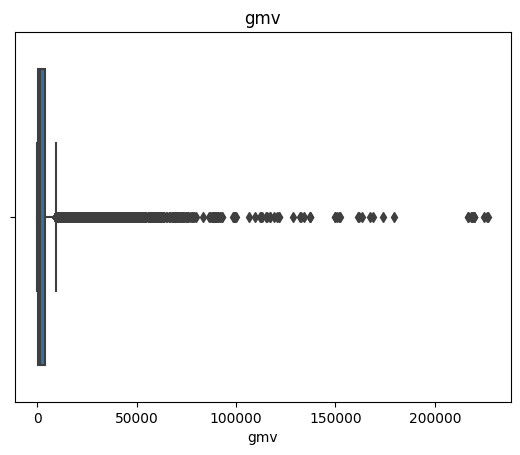

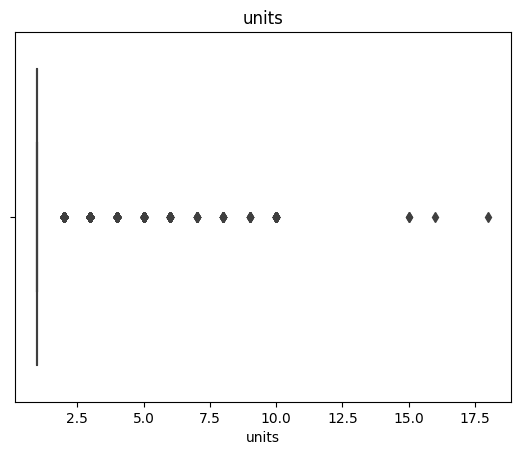

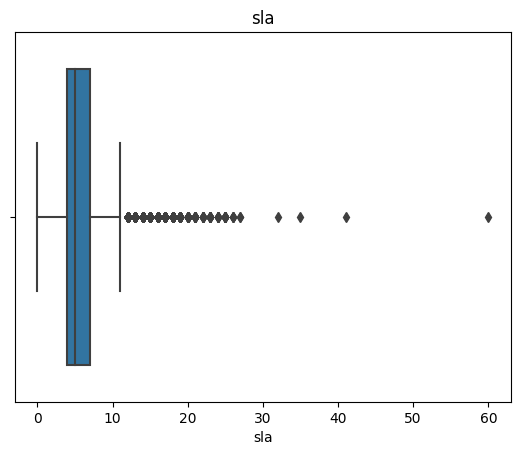

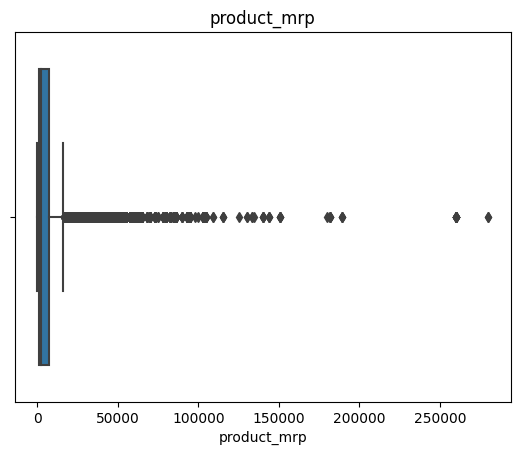

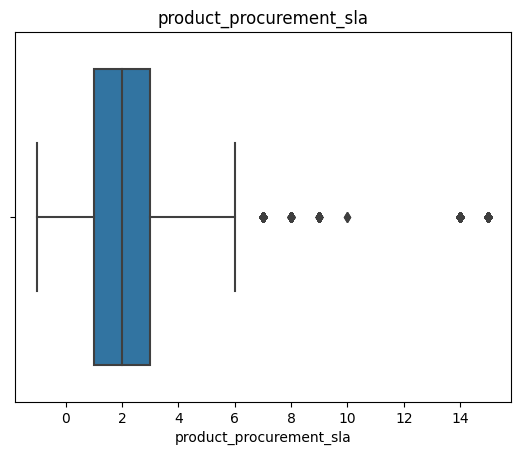

In [27]:
## integer column handling
num=[]
obj=[]
for i in EleData2.columns:
  if EleData2[i].dtype=='float64':
    num.append(i)
  if EleData2[i].dtype=='int64':
    num.append(i)
  if EleData2[i].dtype=='object':
    obj.append(i)


num.remove('order_item_id')

x=1
for i in num:
  plt.title(i)
  sns.boxplot(x=EleData2[i])
  plt.show()
  x=x+1

## we will treat outliers later based on sub categories

In [28]:
EleData2.columns
EleData2.order_date=EleData2['order_date'].dt.date

In [29]:
## Week
EleData2['week']=((pd.to_datetime(EleData2['order_date'])-pd.to_datetime('2015-07-01'))/7)
EleData2['week']=EleData2['week'].apply(lambda x: x.days+1)
EleData2.loc[:,['order_date','week']]
EleData2.week.value_counts()

16    28442
44    13958
19    13225
30    12482
36    12240
25    12165
34    12092
48    11047
26     9762
32     9499
37     9451
23     9406
28     9009
35     9000
24     8572
27     8469
31     8251
33     8234
46     8168
17     8003
18     7957
47     7703
29     7569
22     7442
45     7425
49     7367
40     7159
41     7121
38     7101
50     6966
39     6799
20     6576
51     6530
3      6431
10     6342
15     6243
2      6205
52     6198
13     6141
21     5921
4      5691
12     5595
11     5593
14     5520
42     5282
43     2532
5      2531
53     1724
1      1578
9       933
6         4
8         2
7         1
Name: week, dtype: int64

In [30]:
# 2. Listing Price and Pricing Discounts
EleData2=EleData2[EleData.product_mrp!=0]
EleData2['gmv']=EleData2.gmv.astype(float)
EleData2['listing_price'] = ((EleData2.gmv)/EleData2.units).round(2)
EleData2['discount_per']=(((EleData2['product_mrp']-EleData2['listing_price'])/EleData2['product_mrp'])).round(2)
EleData2.discount_per.describe()
EleData2[EleData2.product_mrp < EleData2.listing_price]
EleData2=EleData2[EleData2.product_mrp >= EleData2.listing_price]

In [31]:
## joining rest of the data and calculating other variables from it
# ProdList
# Investment
# MonthlyNPS
# SalesCal
# Ont2015
# Ont2016


In [32]:
# ## Sales
SalesCal = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Special Sale Calendar")

# SalesCal.head(20)

SalesCal1=pd.DataFrame(['2015-07-18','2015-07-19','2015-08-15','2015-08-16','2015-08-17','2015-08-28','2015-08-29','2015-08-30',
                        '2015-10-15','2015-10-16','2015-10-17','2015-11-07','2015-11-08','2015-11-09','2015-11-10','2015-11-11','2015-11-12',
                        '2015-11-13','2015-11-14','2015-12-25','2015-12-26','2015-12-27','2015-12-28','2015-12-29','2015-12-30','2015-12-31',
                        '2016-01-01','2016-01-02','2016-01-03','2016-01-20','2016-01-21','2016-01-22','2016-02-01','2016-02-02','2016-02-20','2016-02-21',
                       '2016-02-14','2016-02-15','2016-03-07','2016-03-08','2016-03-09','2016-05-25','2016-05-26','2016-05-27'],columns=["sale_date"])

# SalesCal1=SalesCal1[0].to_list()
# SalesCal1
EleData2.order_date=EleData2.order_date.apply(lambda x :str(x).strip())
EleData2=pd.merge(EleData2,SalesCal1,left_on='order_date',right_on='sale_date',how='left')
# # test[~test["date"].isna()]
# EleData2['sale_date'].value_counts()

In [33]:
### Weather infomation canada
Ont2015=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2015.xlsx",header=24)
Ont2016=pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/ONTARIO-2016.xlsx",header=24)
Ont_Weather = pd.concat([Ont2015,Ont2016])
Ont_Weather=Ont_Weather.loc[(Ont_Weather['Date/Time']>='2015-07-01') &(Ont_Weather['Date/Time']<'2016-07-01')]

# Ont2015['Max Temp Flag'].value_counts()
todrop= (Ont_Weather.isnull().sum()/Ont_Weather.shape[0]).reset_index()
todrop
req=todrop.loc[todrop[0]<0.50,:]['index'].to_list()
Ont_Weather=Ont_Weather[req]
Ont_Weather =Ont_Weather.drop(['Total Precip (mm)','Snow on Grnd (cm)','Data Quality'],1)

# Ont_Weather
Ont_Weather['week']=((pd.to_datetime(Ont_Weather['Date/Time'])-pd.to_datetime('2015-07-01'))/7)
Ont_Weather['week']=Ont_Weather['week'].apply(lambda x: x.days+1)
Ont_Weather['Date/Time']=Ont_Weather['Date/Time'].dt.date
weekly_kpis=Ont_Weather.groupby('week').mean().reset_index()

In [34]:
weekly_kpis.head()
weekly_kpis.drop(['Year','Month'],1,inplace=True)

In [35]:

weekly_kpis=weekly_kpis.sort_values(by='week')
Ont_Weather.info()
weekly_kpis.rename(columns={"Max Temp (°C)":"max_temp_c","Min Temp (°C)":"mon_temp_c","Mean Temp (°C)":"mean_temp_c",
                            "Heat Deg Days (°C)":"heat_deg_c","Cool Deg Days (°C)":"cool_deg_c","Total Rain (mm)":"total_rain",
                            "Total Snow (cm)":"total_snow"},inplace=True)
## filling missing values with fronyfill method as temp is time series
weekly_kpis.ffill(inplace=True)
weekly_kpis.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 181 to 181
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date/Time           366 non-null    object 
 1   Year                366 non-null    int64  
 2   Month               366 non-null    int64  
 3   Day                 366 non-null    int64  
 4   Max Temp (°C)       208 non-null    float64
 5   Min Temp (°C)       191 non-null    float64
 6   Mean Temp (°C)      191 non-null    float64
 7   Heat Deg Days (°C)  191 non-null    float64
 8   Cool Deg Days (°C)  191 non-null    float64
 9   Total Rain (mm)     215 non-null    float64
 10  Total Snow (cm)     215 non-null    float64
 11  week                366 non-null    int64  
dtypes: float64(7), int64(4), object(1)
memory usage: 37.2+ KB


week           0
Day            0
max_temp_c     0
mon_temp_c     0
mean_temp_c    0
heat_deg_c     0
cool_deg_c     0
total_rain     0
total_snow     0
dtype: int64

In [36]:
# MonthlyNPS
MonthlyNPS = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",sheet_name="Monthly NPS Score")
# ?pd.melt
MonthlyNPS.head()
NPS = pd.melt(MonthlyNPS,id_vars="Unnamed: 0",value_vars=["July'15","Aug'15","Sept'15","Oct'15","Nov'15",
                                                  "Dec'15","Jan'16","Feb'16","Mar'16","Apr'16",
                                                  "May'16","June'16"],).reset_index()
# ?pd.pivot
NPS.rename(columns={"Unnamed: 0":"Header","variable":"Month1","value":"Value"},inplace=True)
# NPS
# NPS
NPS['Month']=0
NPS.loc[NPS["Month1"].str.startswith("July"), "Month"] = 7
NPS.loc[NPS["Month1"].str.startswith("Aug"), "Month"] = 8
NPS.loc[NPS["Month1"].str.startswith("Sept"), "Month"] = 9
NPS.loc[NPS["Month1"].str.startswith("Oct"), "Month"] = 10
NPS.loc[NPS["Month1"].str.startswith("Nov"), "Month"] = 11
NPS.loc[NPS["Month1"].str.startswith("Dec"), "Month"] = 12
NPS.loc[NPS["Month1"].str.startswith("Jan"), "Month"] = 1
NPS.loc[NPS["Month1"].str.startswith("Feb"), "Month"] = 2
NPS.loc[NPS["Month1"].str.startswith("Mar"), "Month"] = 3
NPS.loc[NPS["Month1"].str.startswith("Apr"), "Month"] = 4
NPS.loc[NPS["Month1"].str.startswith("May"), "Month"] = 5
NPS.loc[NPS["Month1"].str.startswith("June"), "Month"] = 6
NPS['Year'] = pd.Series([2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016])
NPS['Month']=NPS['Month'].astype(str)
NPS.drop("index",1,inplace=True)

# print(NPS)
# print(NPS)
NPS


,Header,Month1,Value,Month,Year
0,NPS,July'15,54.599588,7,2015
1,Stock Index,July'15,1177.000000,7,2015
2,NPS,Aug'15,59.987101,8,2015
3,Stock Index,Aug'15,1206.000000,8,2015
4,NPS,Sept'15,46.925419,9,2015
5,Stock Index,Sept'15,1101.000000,9,2015
6,NPS,Oct'15,44.398389,10,2015
7,Stock Index,Oct'15,1210.000000,10,2015
8,NPS,Nov'15,47.000000,11,2015
9,Stock Index,Nov'15,1233.000000,11,2015


In [37]:
EleData2.rename(columns={"Year_x":"Year","Month_x":"Month"},inplace=True)
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='Stock Index'],how='left',on='Month')
EleData2=pd.merge(EleData2,NPS.loc[NPS['Header']=='NPS'],how='left',on='Month')
# EleData2['Year_x'].count()
EleData2.rename(columns={"Value_x":"Stock_Index","Value_y":"NPS"},inplace=True)


In [38]:
# lets clean the frame with _x _y coluumns
# EleData2.columns
EleData2['Year']=EleData2['Year_x']
# EleData2['week']=EleData2['week_x']

col=[]
for i in EleData2.columns:
  if (str(i).endswith("_x")) | (str(i).endswith("_y") | (str(i)=='key_0')):
    col.append(i)

EleData2.drop(col,1,inplace=True)


In [39]:
EleData2.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived', 'week', 'listing_price',
       'discount_per', 'sale_date', 'Stock_Index', 'NPS', 'Year'],
      dtype='object')

In [40]:
### Investments

Investment = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/E-Commerce Capstone Dataset/Media data and other information.xlsx",header=2,sheet_name="Media Investment")
Investment.isna().sum()
Investment.fillna(0,inplace=True)
Investment.drop(["Unnamed: 0"],1,inplace=True)
Investment=Investment.loc[Investment.Year!=0]
Investment.head()
Investment['month_start'] = pd.to_datetime(Investment[['Year', 'Month']].assign(DAY=1))
Investment.set_index('month_start',inplace=True)


In [41]:
# Investment.info()
july=Investment.index[-1] + pd.offsets.MonthBegin(1)
july

Timestamp('2016-07-01 00:00:00')

In [42]:
Investment =Investment.append(Investment.iloc[[-1]].rename({Investment.index[-1]: july}))
Inv2=Investment.resample("W").ffill().reset_index()
Inv2.set_index('month_start',inplace=True)
# Inv2=Inv2.iloc[:-1]
# EleData2['week'].value_counts()
Inv2.head()
Inv2.rename(columns={' Affiliates':'Affiliates'},inplace=True)


In [43]:
Inv2['Total Investment'] = Inv2['Total Investment']/Inv2.resample('MS')['Total Investment'].transform('size')
Inv2['TV'] = Inv2['TV']/Inv2.resample('MS')['TV'].transform('size')
Inv2['Digital'] = Inv2['Digital'] /Inv2.resample('MS')['Digital'].transform('size')
Inv2['Sponsorship'] = Inv2['Sponsorship']/Inv2.resample('MS')['Sponsorship'].transform('size')
Inv2['Content Marketing'] = Inv2['Content Marketing']/Inv2.resample('MS')['Content Marketing'].transform('size')
Inv2['Online marketing'] = Inv2['Online marketing']/ Inv2.resample('MS')['Online marketing'].transform('size')
Inv2['Affiliates'] = Inv2['Affiliates']/ Inv2.resample('MS')['Affiliates'].transform('size')
Inv2['SEM'] = Inv2['SEM']/Inv2.resample('MS')['SEM'].transform('size')
Inv2['Radio'] = Inv2['Radio']/Inv2.resample('MS')['Radio'].transform('size')
Inv2['Other'] = Inv2['Other']/Inv2.resample('MS')['Other'].transform('size')



In [44]:
## aDstock
# EleData3.columns
# considering 0.5 decay
ad = ['Total Investment', 'TV', 'Digital','Sponsorship', 'Content Marketing', 'Online marketing', ' Affiliates','SEM', 'Radio', 'Other']
def adstock(channel):
  Inv_ad=[]
  for i in range(0,(len(Inv2))):
    if i==0:
      Inv_ad.append(Inv2.iloc[i][channel].round(2))
    else:
      Inv_ad.append((Inv2.iloc[i][channel]+ (0.5 * Inv2.iloc[i-1][channel])).round(2))
  return Inv_ad


In [45]:
Inv2['Total_Investment_AD']=adstock("Total Investment")
Inv2['TV_AD']=adstock("TV")
Inv2['Digital_AD']=adstock("Digital")
Inv2['Content_Marketing_AD']=adstock("Content Marketing")
Inv2['Sponsorship_AD']=adstock("Sponsorship")
Inv2['Online_marketing_AD']=adstock("Online marketing")
Inv2['Affiliates_AD']=adstock("Affiliates")
Inv2['SEM_AD']=adstock("SEM")
Inv2['Radio_AD']=adstock("Radio")
Inv2['Other_AD']=adstock("Other")


In [46]:
Inv2['week']=nm.arange(1,54)
weekly_kpis=pd.merge(weekly_kpis,Inv2,on='week')

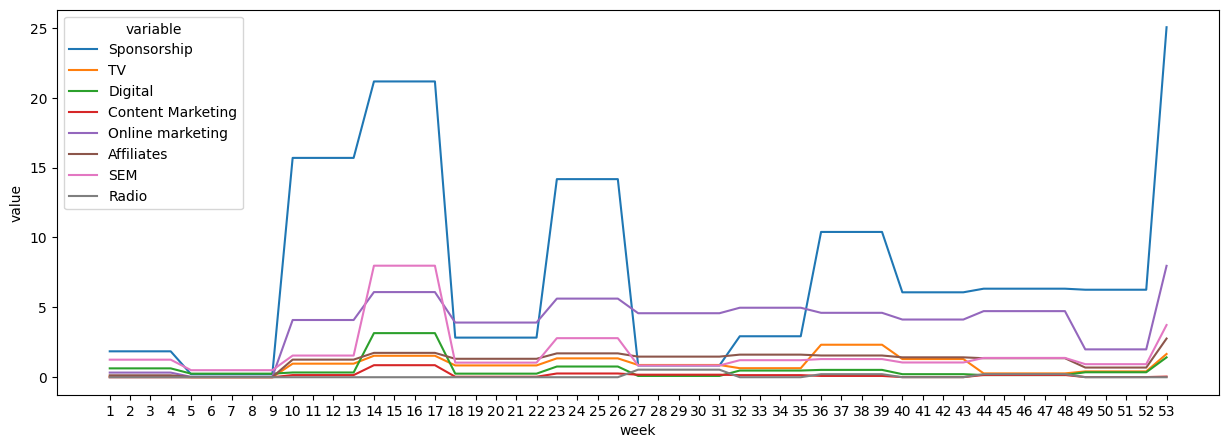

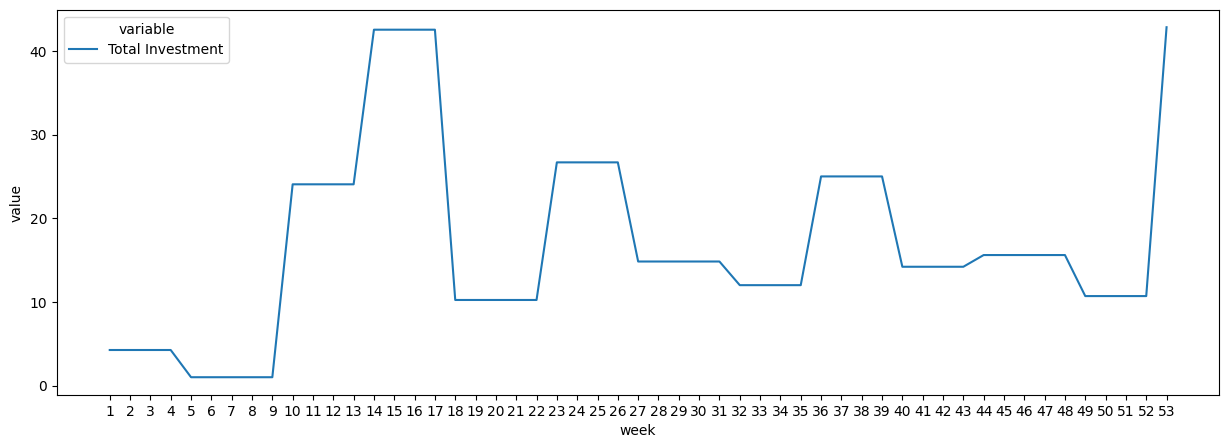

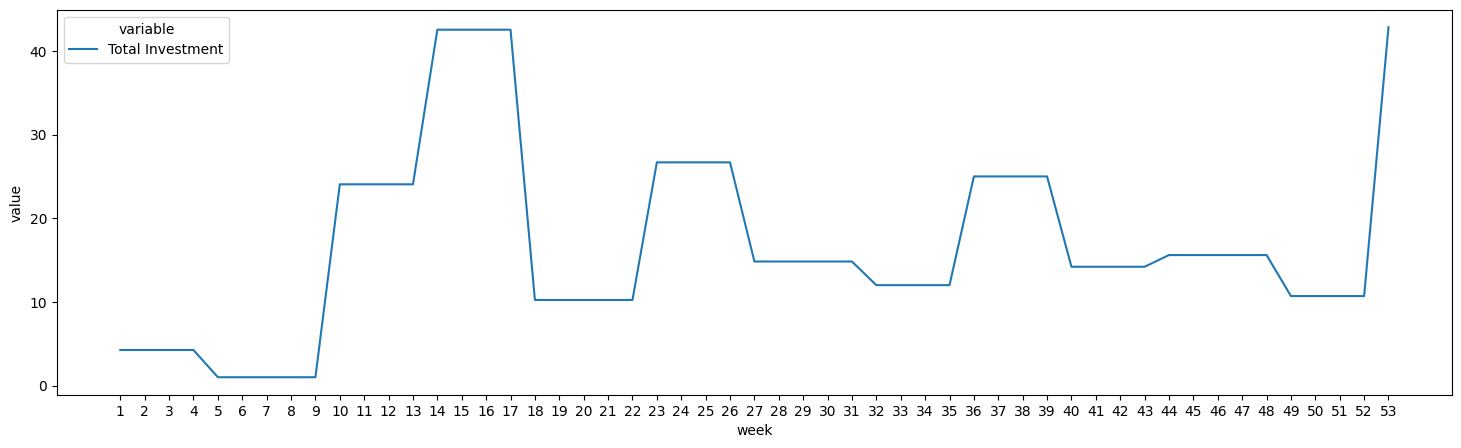

In [47]:
markinv = ['week', 'Sponsorship','TV','Digital', 'Content Marketing', 'Online marketing','Affiliates', 'SEM', 'Radio']

plt.figure(figsize=(15,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[markinv],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()

plt.figure(figsize=(15,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[['Total Investment','week']],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()

plt.figure(figsize=(18,5))
sns.lineplot(x='week',y='value',data=pd.melt(Inv2[['Total Investment','week']],['week']),hue='variable')
plt.xticks(Inv2['week'])
plt.show()



In [48]:
## Pay Date month end, 1st , 15 the and 16th
EleData2.order_date=pd.to_datetime(EleData2.order_date).dt.date
EleData2["pay_date_flag"]=EleData2['order_date'].apply(lambda x : 1 if ((x).day==15|(x).day==1|(x).day==16)|(pd.to_datetime(x).is_month_end) else 0)


In [49]:
# holiday flag
import holidays
holidays=pd.DataFrame(pd.Series(holidays.CA(prov='ON',years=[2015,2016]))).reset_index()
holidays=holidays.rename(columns={'index':'Holiday_flag'})
holidays=holidays.drop(0,axis=1)
holidays['Holiday_flag']=pd.to_datetime(holidays['Holiday_flag'], dayfirst=True)
holidays.info()
holidays['Holiday_flag']=holidays['Holiday_flag'].dt.date


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Holiday_flag  18 non-null     datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 272.0 bytes


In [50]:
EleData3=pd.merge(EleData2,holidays,how='left',left_on='order_date',right_on='Holiday_flag').fillna(0)

In [51]:
## payment type
EleData3.order_payment_type= EleData3.order_payment_type.apply(lambda x : 1 if x=='cod' else 0)


In [52]:
EleData3.pay_date_flag.value_counts()

0    375247
1     10749
Name: pay_date_flag, dtype: int64

In [53]:
### Luxary vs mass product

pd.DataFrame(EleData3['product_mrp']).describe(percentiles=[.70,.80,.90]).T
EleData3['luxury'] = EleData3['product_mrp'].apply(lambda x:1 if x >= 8000.0 else 0)


## Generic EDA

In [54]:
df_prod=EleData3.groupby(['product_analytic_sub_category','product_analytic_vertical'])['gmv'].sum()
df_prod=pd.DataFrame(df_prod.reset_index())
# df_prod.rename(columns={0:"count"},inplace=True)

In [55]:
df_prod

,product_analytic_sub_category,product_analytic_vertical,gmv
0,camera,camcorders,1.520801e+07
1,camera,dslr,1.378907e+09
2,camera,instant cameras,1.115525e+07
3,camera,point & shoot,2.587350e+08
4,camera,sportsandaction,1.932014e+07
5,gamingaccessory,coolingpad,3.833400e+04
6,gamingaccessory,gamecontrolmount,2.099000e+03
7,gamingaccessory,gamepad,6.082473e+07
8,gamingaccessory,gamingaccessorykit,4.773648e+06
9,gamingaccessory,gamingadapter,1.955297e+06


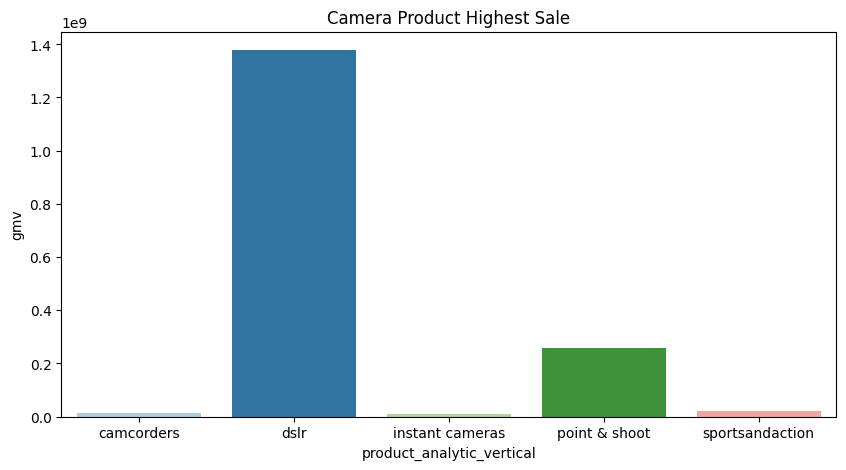

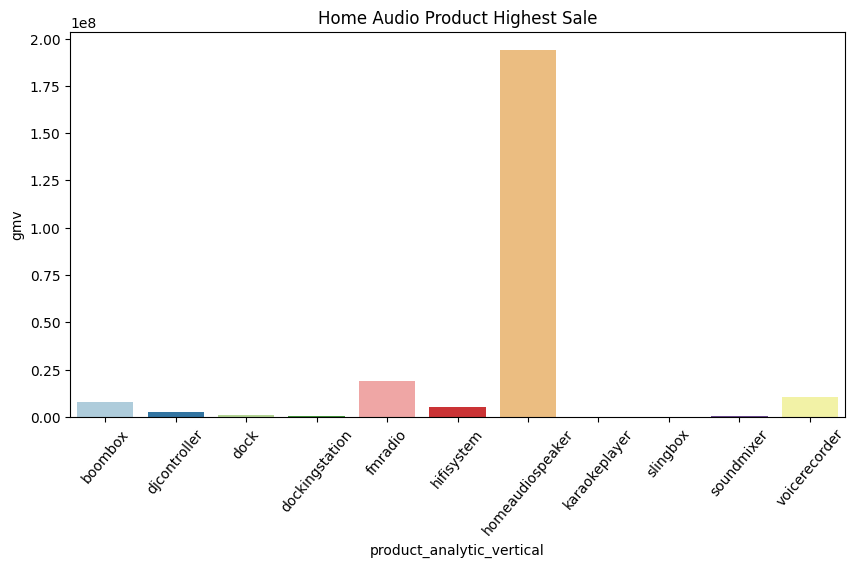

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'coolingpad'),
  Text(1, 0, 'gamecontrolmount'),
  Text(2, 0, 'gamepad'),
  Text(3, 0, 'gamingaccessorykit'),
  Text(4, 0, 'gamingadapter'),
  Text(5, 0, 'gamingchargingstation'),
  Text(6, 0, 'gamingheadset'),
  Text(7, 0, 'gamingkeyboard'),
  Text(8, 0, 'gamingmemorycard'),
  Text(9, 0, 'gamingmouse'),
  Text(10, 0, 'gamingmousepad'),
  Text(11, 0, 'gamingspeaker'),
  Text(12, 0, 'joystickgamingwheel'),
  Text(13, 0, 'motioncontroller'),
  Text(14, 0, 'tvoutcableaccessory')])

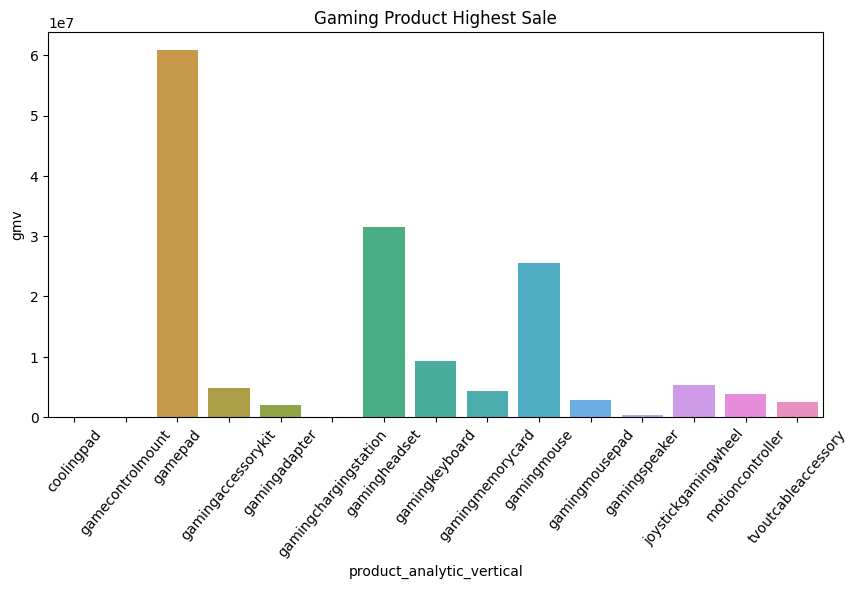

In [56]:
# df_prod.sort_values('product_analytic_sub_category')
plt.figure(figsize=(10,5))
sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='camera'] , x='product_analytic_vertical' ,y='gmv')
plt.title("Camera Product Highest Sale")
plt.show()

plt.figure(figsize=(10,5))

sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='homeaudio'] , x='product_analytic_vertical',y='gmv' )
plt.title("Home Audio Product Highest Sale")
plt.xticks(rotation = 50)
plt.show()

plt.figure(figsize=(10,5))

sns.set_palette("Paired")
sns.barplot(data = df_prod[df_prod.product_analytic_sub_category=='gamingaccessory'] , x='product_analytic_vertical',y='gmv')
plt.title("Gaming Product Highest Sale")
plt.xticks(rotation = 50)
# plt.show()

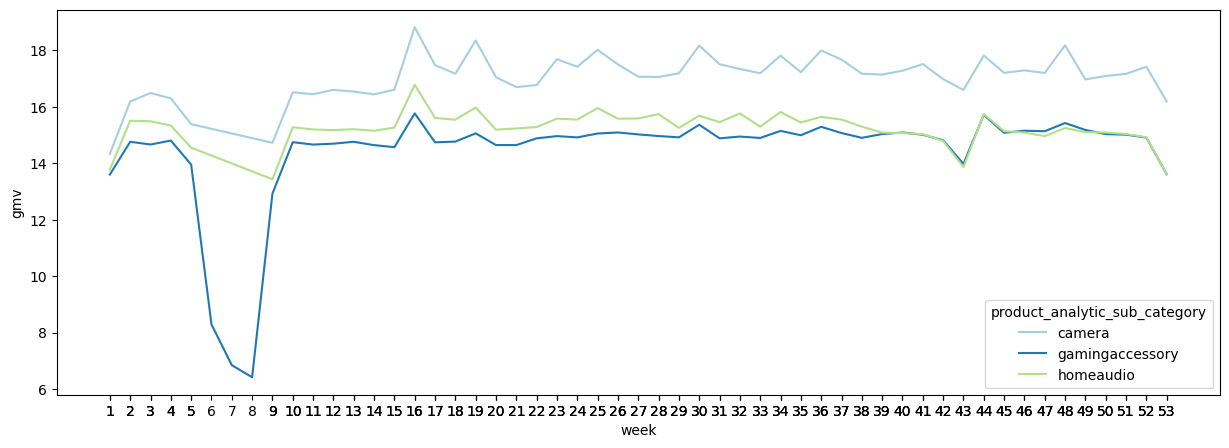

In [57]:
### Week on Week sales of product category

wowgmv=EleData3.groupby(['week','product_analytic_sub_category'])['gmv'].sum().reset_index()
plt.figure(figsize=(15,5))
sns.lineplot(x=wowgmv.week,y=nm.log(wowgmv.gmv),hue=wowgmv.product_analytic_sub_category)
plt.xticks(wowgmv['week'])
plt.show()


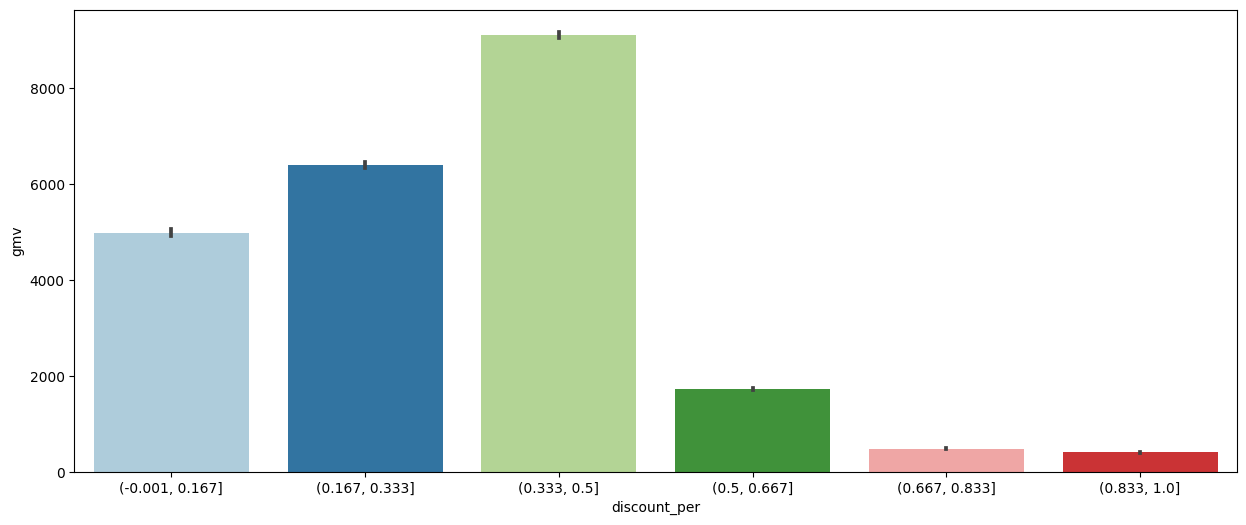

In [58]:

## sales impact wow
plt.figure(figsize=(15,6))
sns.barplot(y=EleData3['gmv'],x=pd.cut(EleData3['discount_per'],bins=6))
plt.show()



# Data Aggregation and analysis

Camera Analysis

In [59]:
##
camera=EleData3[EleData3.product_analytic_sub_category=='camera']
# camera.discount_per

In [60]:
camera.columns


Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived', 'week', 'listing_price',
       'discount_per', 'sale_date', 'Stock_Index', 'NPS', 'Year',
       'pay_date_flag', 'Holiday_flag', 'luxury'],
      dtype='object')

In [61]:
cam_dummies = pd.get_dummies(camera['product_analytic_vertical'])
camera=pd.concat([camera,cam_dummies],axis=1)


In [62]:
camera.drop(["product_analytic_sub_category","product_analytic_category"],1,inplace=True)

In [63]:
num
num.append('discount_per')
num.append('listing_price')

In [64]:
camera[num].describe()

,gmv,units,sla,product_mrp,product_procurement_sla,discount_per,listing_price
count,94706.000000,94706.000000,94706.000000,94706.000000,94706.000000,94706.000000,94706.000000
mean,17774.221234,1.011816,4.694370,27114.656505,2.777754,0.321185,17615.696167
std,11423.619524,0.143116,2.399058,16922.490081,2.490936,0.133102,11240.653746
min,0.000000,1.000000,0.000000,599.000000,-1.000000,0.000000,0.000000
25%,6599.000000,1.000000,3.000000,8000.000000,1.000000,0.210000,6552.000000
50%,19490.000000,1.000000,4.000000,34950.000000,3.000000,0.350000,19490.000000
75%,24990.000000,1.000000,6.000000,40000.000000,4.000000,0.430000,24990.000000
max,226947.000000,9.000000,35.000000,280000.000000,15.000000,1.000000,226947.000000


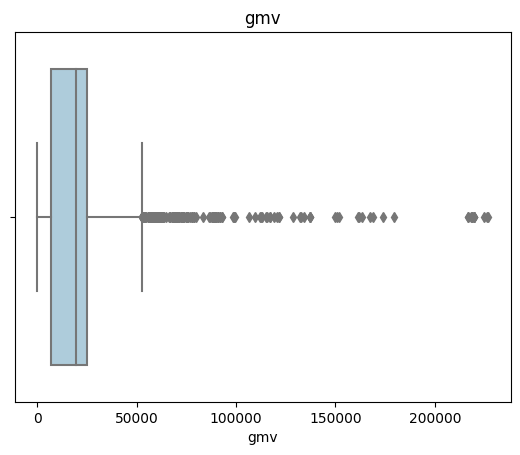

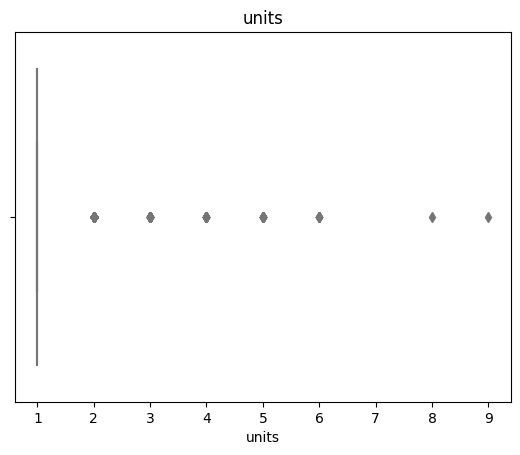

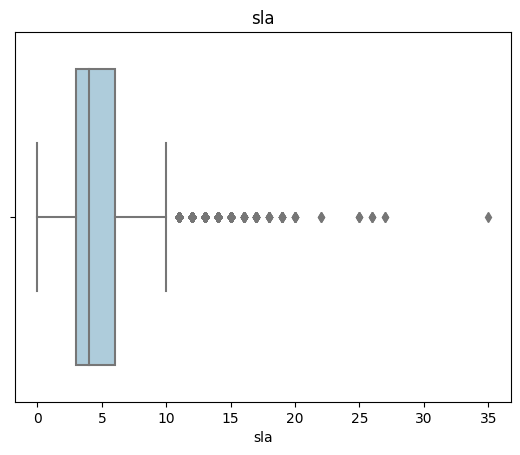

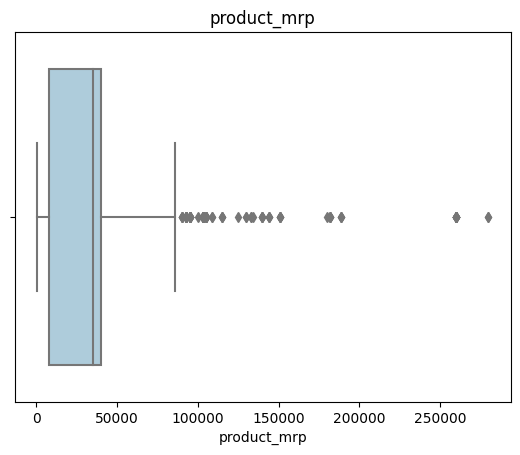

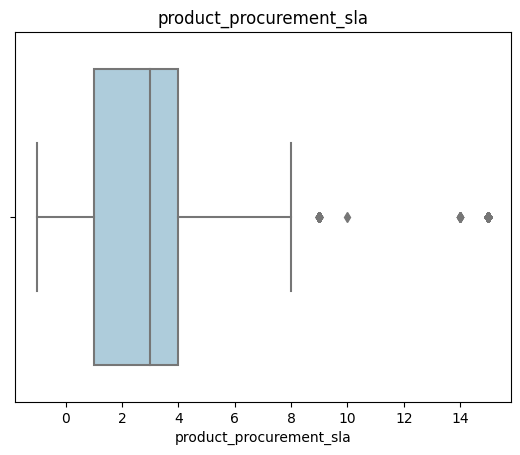

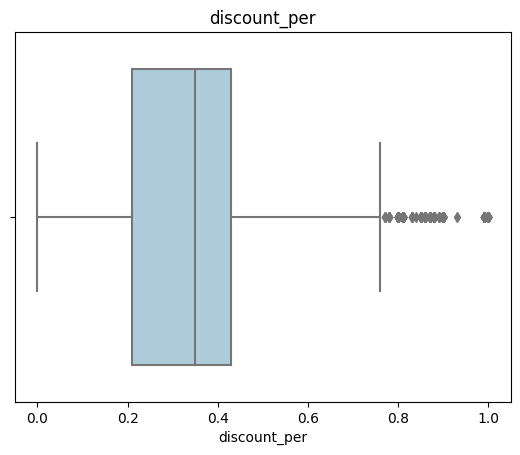

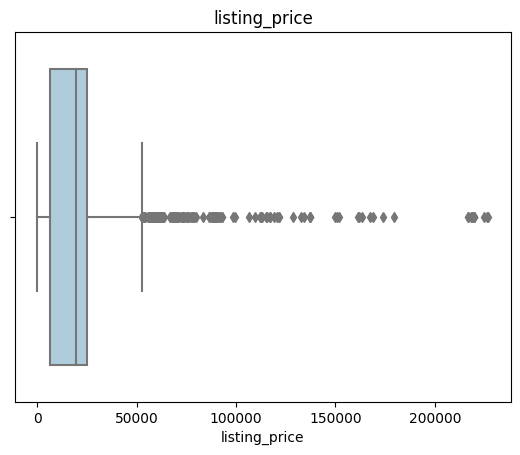

In [65]:
for i in num:
  sns.boxplot(x=camera[i])
  plt.title(i)
  plt.show()

In [66]:
# Product mrp , gmv , listing price is fine and expected but we can replace sla , procurement sla

In [67]:
# q1=camera['gmv'].quantile(0.25)
# q3=camera['gmv'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# camera[camera['gmv']>72373.5]
# camera.loc[camera['gmv']>up,'gmv']=up
# camera.loc[camera['gmv']<lw,'gmv']=lw

In [68]:
# q1=camera['listing_price'].quantile(0.25)
# q3=camera['listing_price'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# # camera[camera['listing_price']>72373.5]
# camera.loc[camera['listing_price']>up,'listing_price']=up
# camera.loc[camera['listing_price']<lw,'listing_price']=lw

In [69]:
camera['product_mrp'].describe()

count     94706.000000
mean      27114.656505
std       16922.490081
min         599.000000
25%        8000.000000
50%       34950.000000
75%       40000.000000
max      280000.000000
Name: product_mrp, dtype: float64

In [70]:
# q1=camera['discount_per'].quantile(0.25)
# q3=camera['discount_per'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# camera[camera['discount_per']>1.39]
# camera.loc[camera['discount_per']>up,'discount_per']=up
# camera.loc[camera['discount_per']<lw,'discount_per']=lw


q1=camera['sla'].quantile(0.25)
q3=camera['sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera.loc[camera['sla']>up,'sla']=up
camera.loc[camera['sla']<lw,'sla']=lw

q1=camera['product_procurement_sla'].quantile(0.25)
q3=camera['product_procurement_sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
camera.loc[camera['product_procurement_sla']>up,'product_procurement_sla']=up
camera.loc[camera['product_procurement_sla']<lw,'product_procurement_sla']=lw

-1.5   10.5
-3.5   8.5


In [71]:
camera.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_vertical', 'product_mrp',
       'product_procurement_sla', 'product_analytic_vertical_derived', 'week',
       'listing_price', 'discount_per', 'sale_date', 'Stock_Index', 'NPS',
       'Year', 'pay_date_flag', 'Holiday_flag', 'luxury', 'camcorders', 'dslr',
       'instant cameras', 'point & shoot', 'sportsandaction'],
      dtype='object')

In [218]:
camera_wk=camera.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique","dslr":"sum","point & shoot":"sum","luxury":"sum",
                                        'camcorders':"sum",'instant cameras':"sum", 'sportsandaction':"sum"}).round(2)

camera_wk=pd.merge(camera_wk,weekly_kpis,on='week')

camera_wk.rename(columns={"sale_date":"num_of_sales"},inplace=True)

In [219]:
camera_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day'],1,inplace=True)

In [220]:
camera_wk.order_payment_type.value_counts()
camera_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
camera_wk["cod_per"]=camera_wk["order_payment_cod"]/camera_wk["order_count"]
camera_wk.drop("order_payment_cod",1,inplace=True)
camera_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)


In [221]:
camera_wk.num_of_sales=camera_wk.num_of_sales-1
# camera_wk.head()

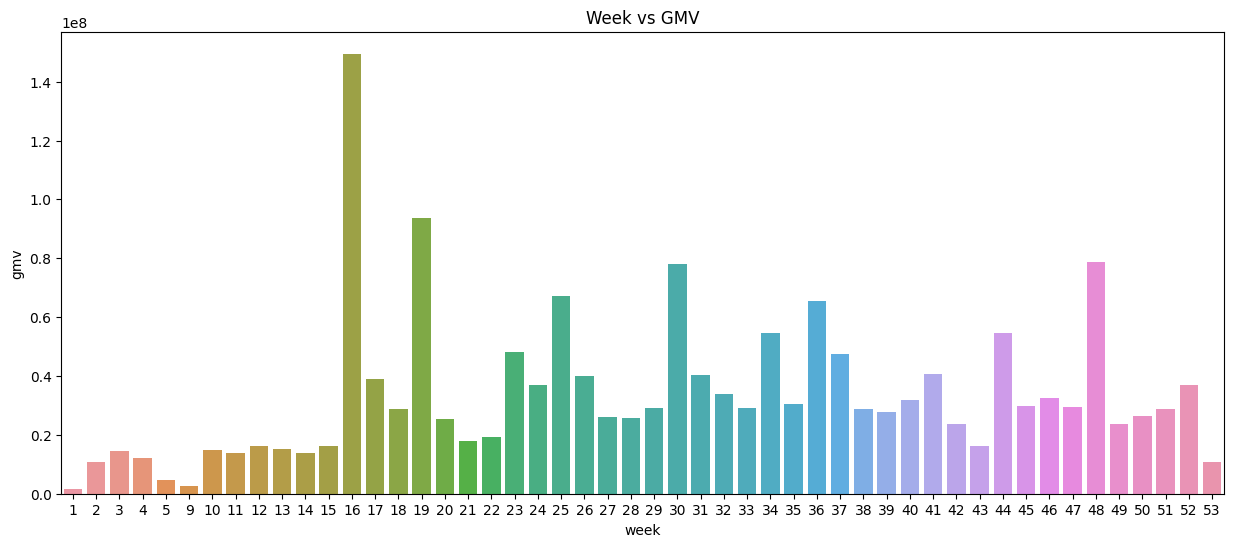

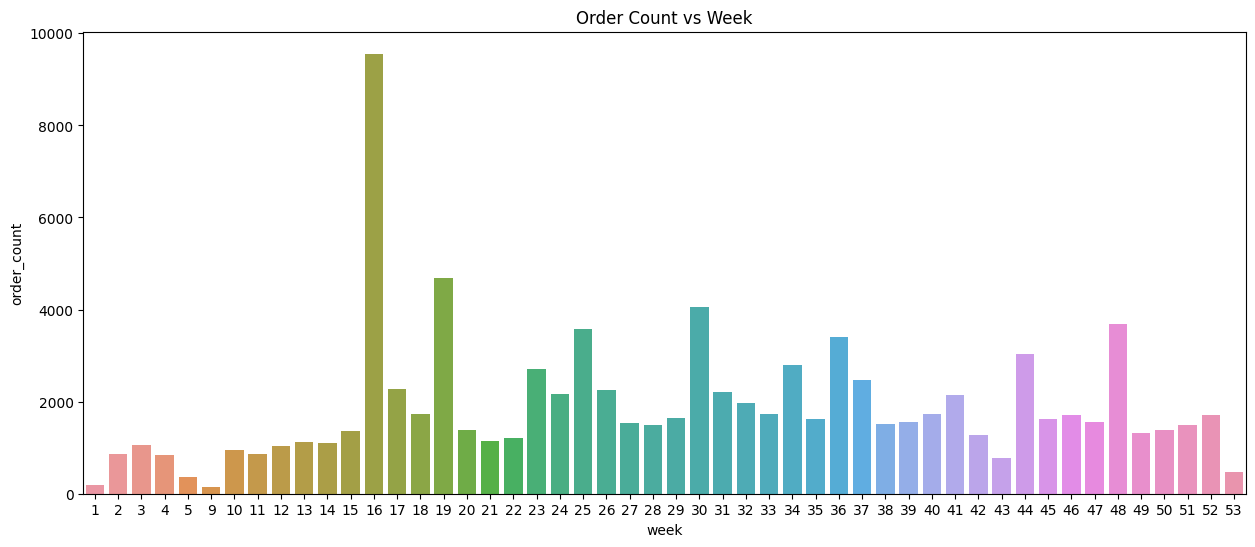

In [222]:


plt.figure(figsize=(15,6))
sns.barplot(x=camera_wk['week'],y=camera_wk['gmv'])
plt.title("Week vs GMV")
plt.show()
# On an avverage 3 sales a week giving better result


plt.figure(figsize=(15,6))
sns.barplot(x=camera_wk['week'],y=camera_wk['order_count'])
plt.title("Order Count vs Week")
plt.show()

## On week 16 , 19, 25, 30,36,44 and 48 sales was good

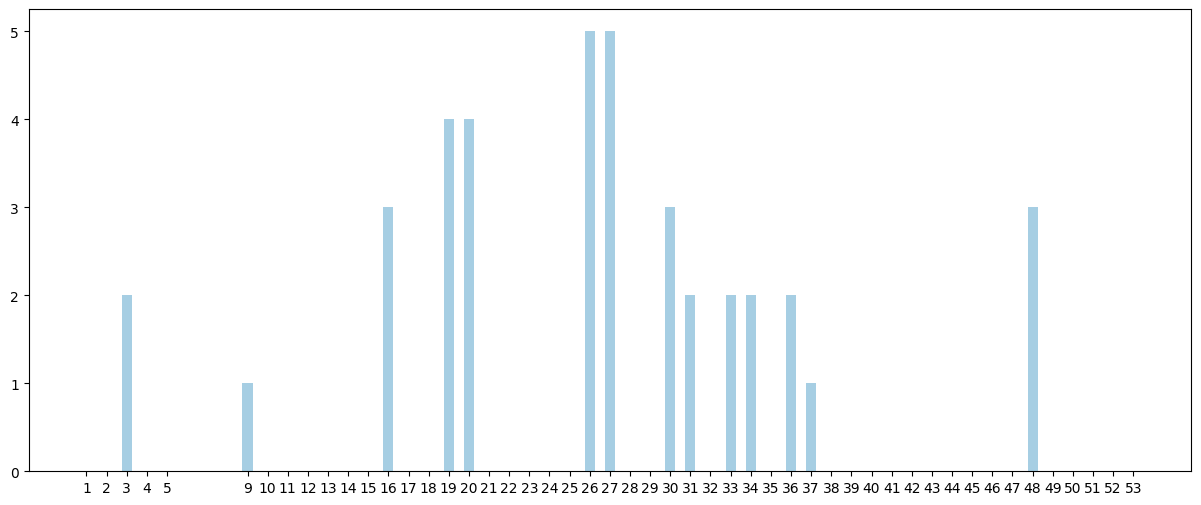

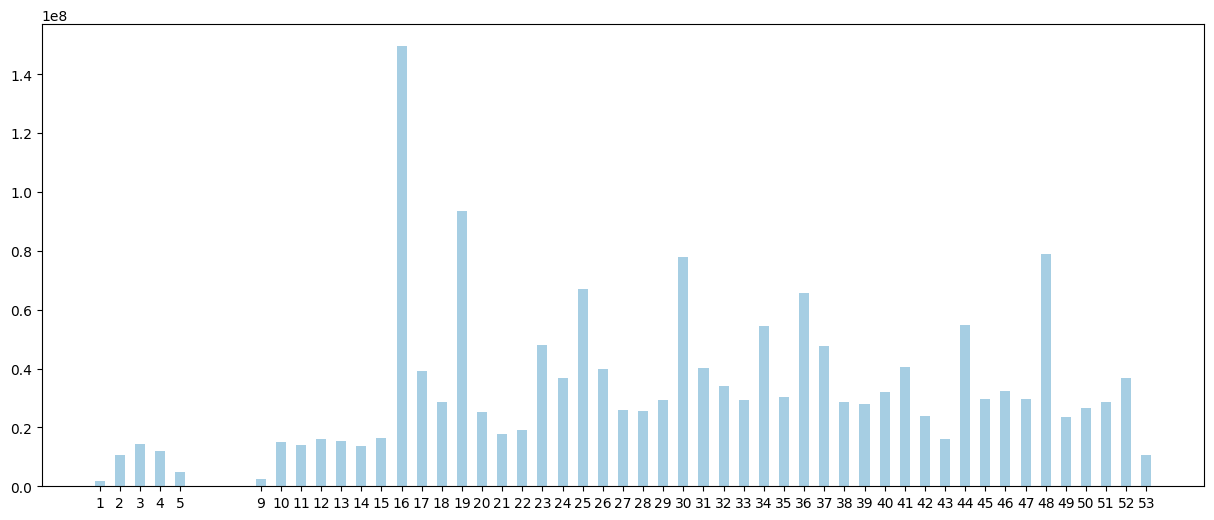

In [77]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=camera_wk['week'],height=camera_wk['num_of_sales'],width=width)
plt.xticks(camera_wk['week'])
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=camera_wk['week'],height=camera_wk['gmv'],width=width)
plt.xticks(camera_wk['week'])
plt.show()

##  week 16th had 3 days of sale and it improved its gmv, similarly for week 48, 19 and 30
# But in Week 26 27 5 days were sale days bt id didnt improve the GMV much

# Week 16, 19 , 30 , 34,36 and 48 : has impact because has good gmv and number of sales

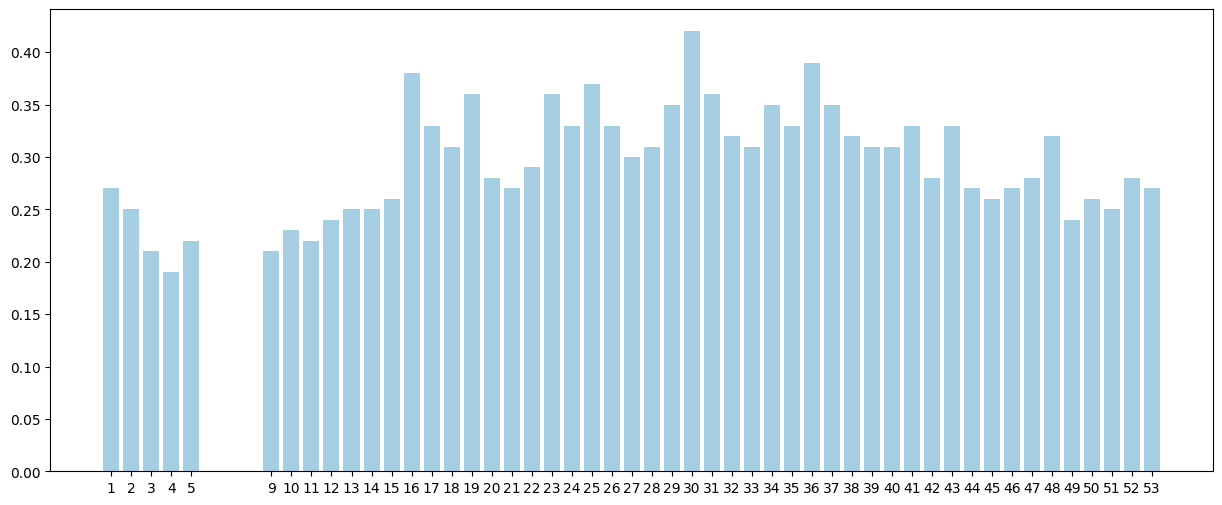

In [78]:
plt.figure(figsize=(15,6))
plt.bar(x=camera_wk['week'],height=camera_wk['discount_per'])
plt.xticks(camera_wk['week'])
plt.show()



### Now week 25th may not have any sale but disocunts were given for most items and hence GMV was improved which makes sense

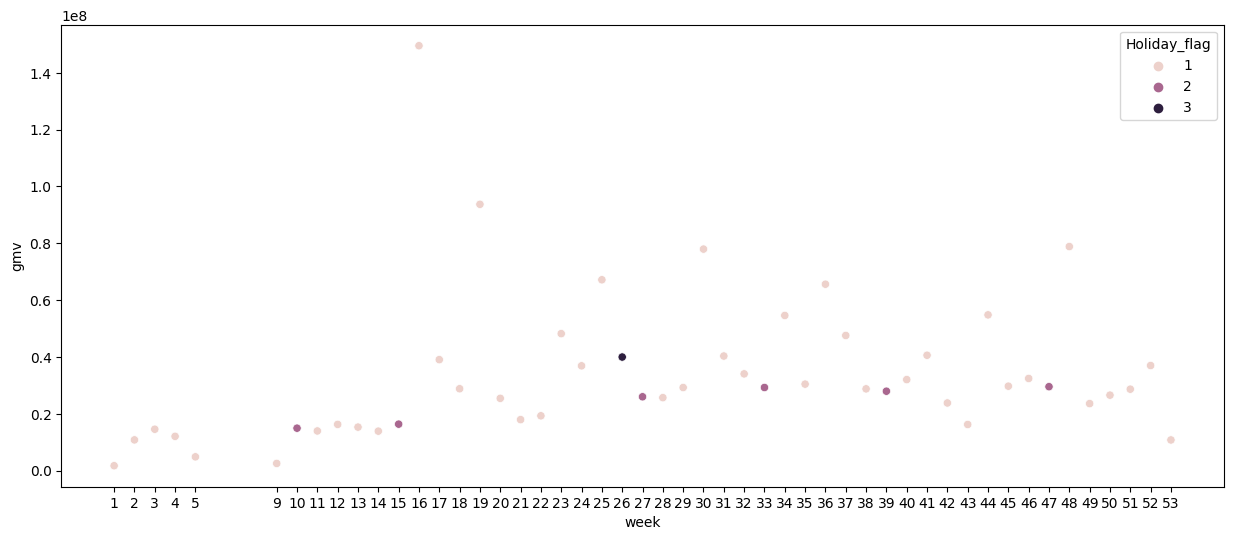

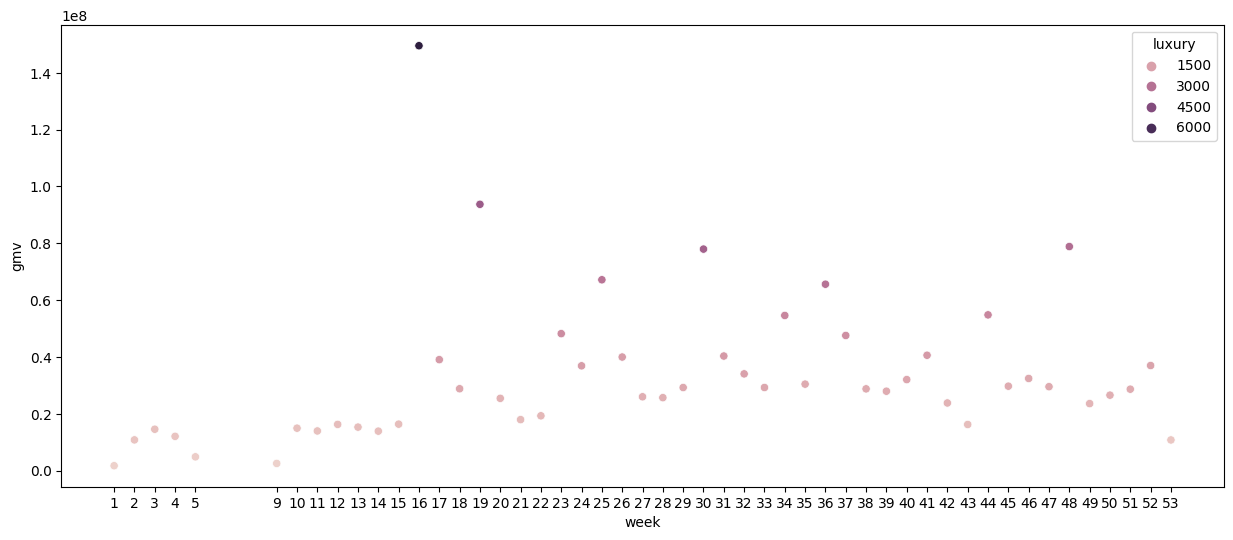

In [79]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=camera_wk['week'],y=camera_wk['gmv'],hue=camera_wk['Holiday_flag'])
plt.xticks(camera_wk['week'])
plt.show()

plt.figure(figsize=(15,6))
sns.scatterplot(x=camera_wk['week'],y=camera_wk['gmv'],hue=camera_wk['luxury'])
plt.xticks(camera_wk['week'])
plt.show()

# Week 26, 15, 27 33 39 47


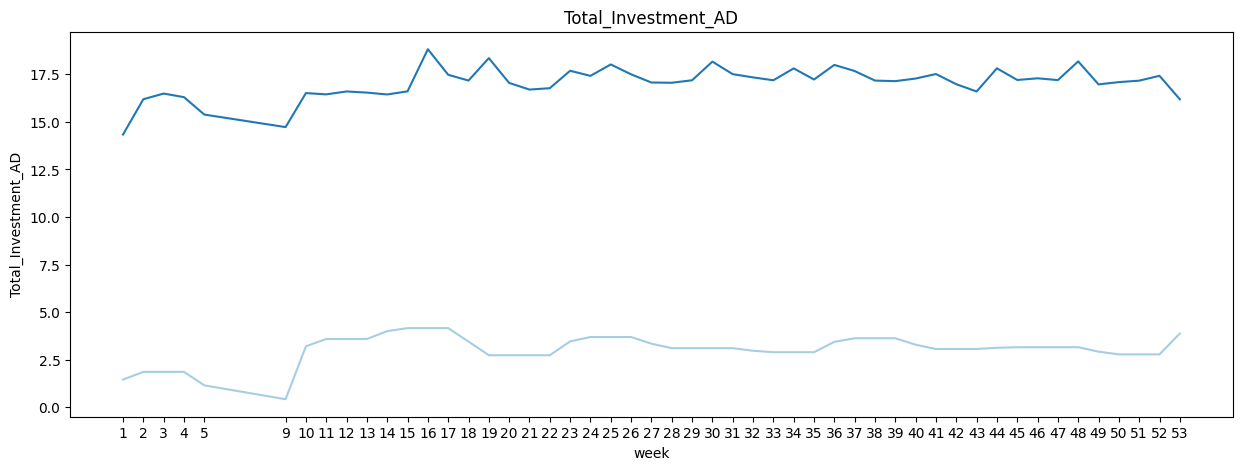

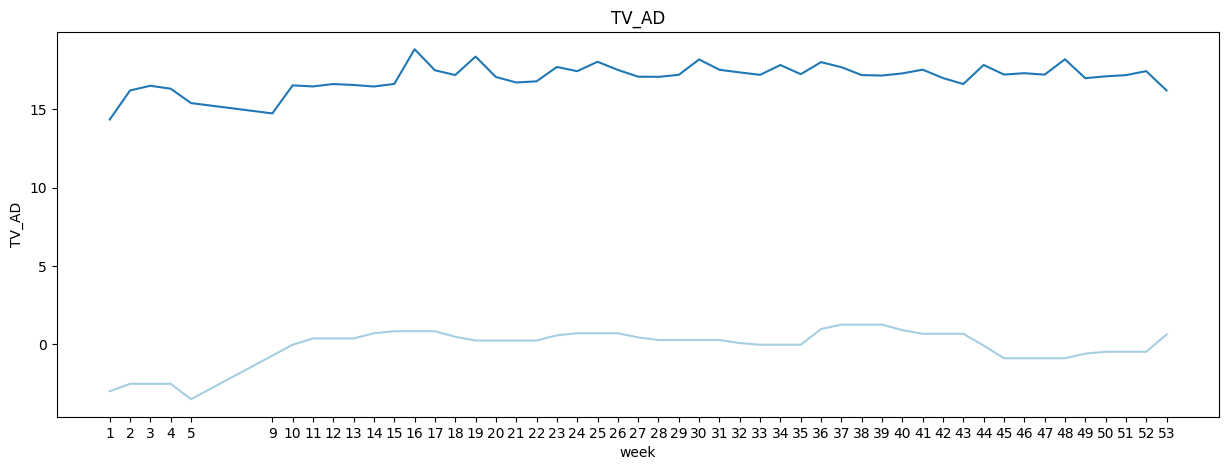

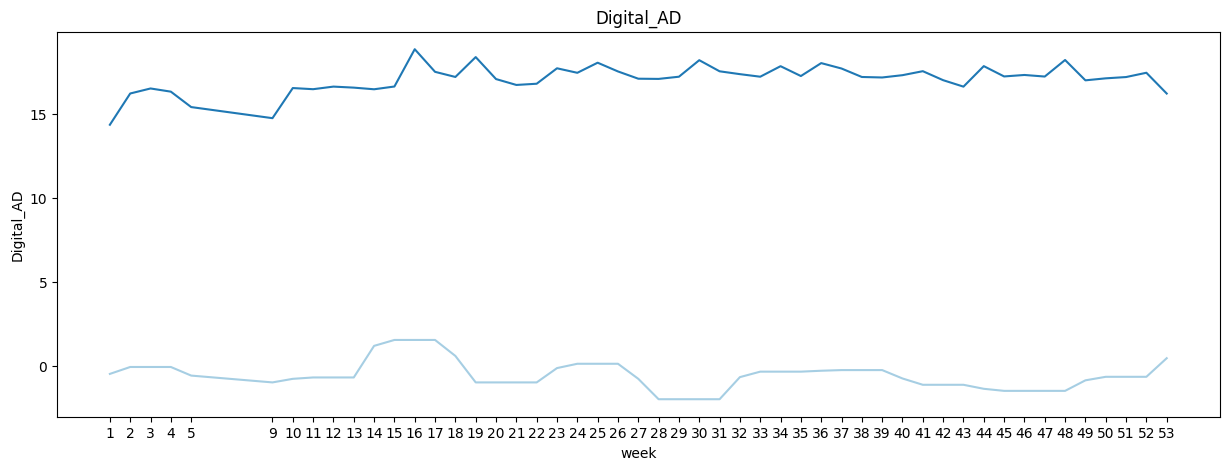

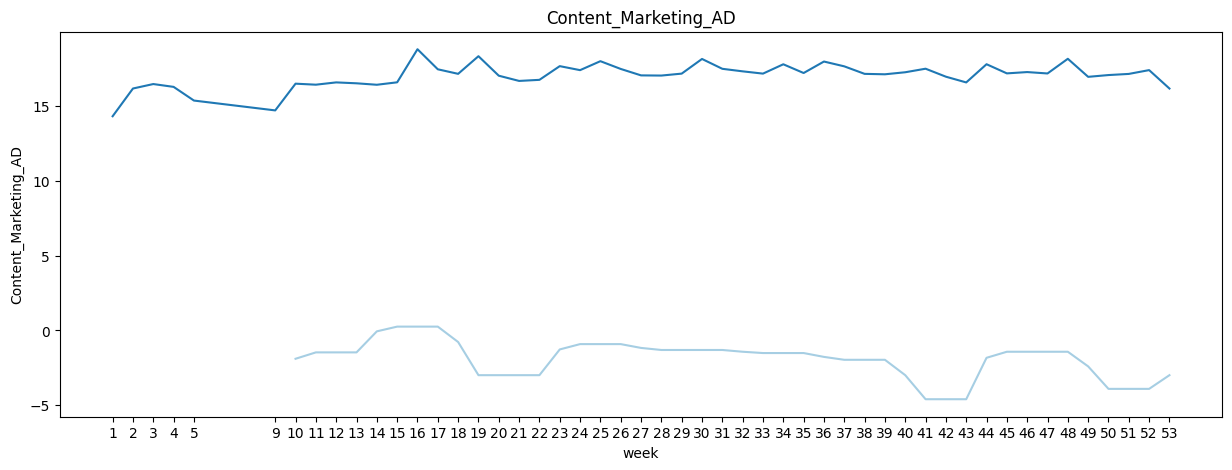

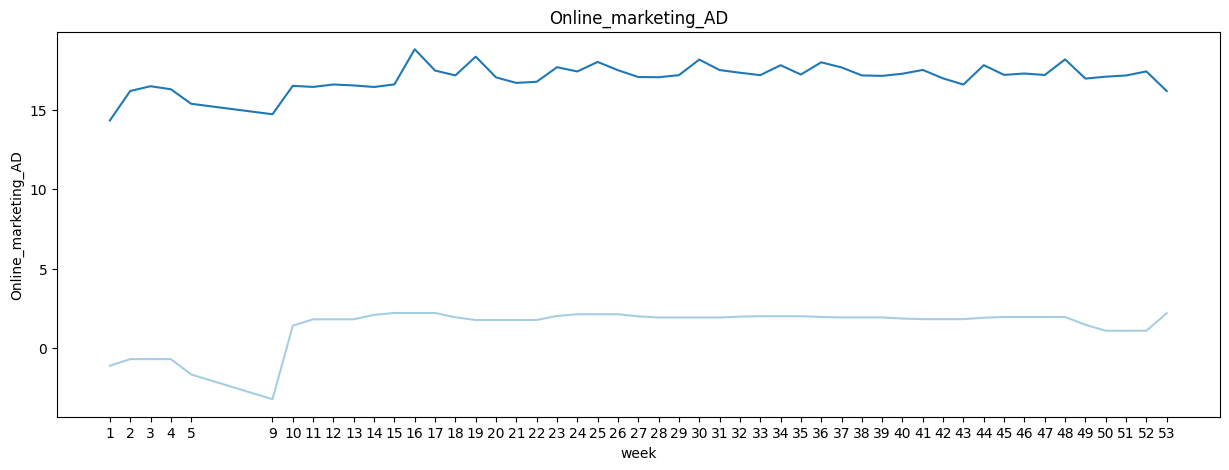

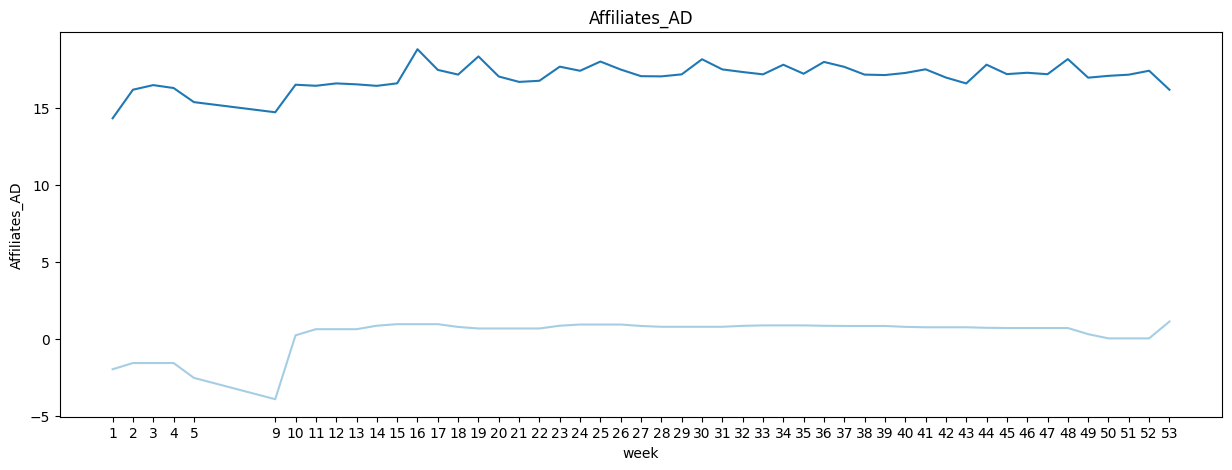

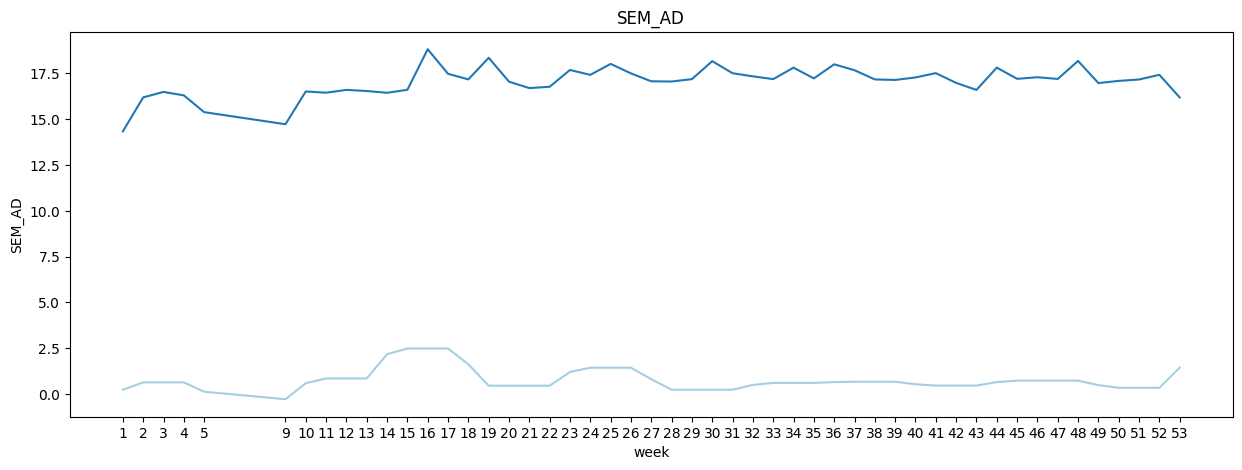

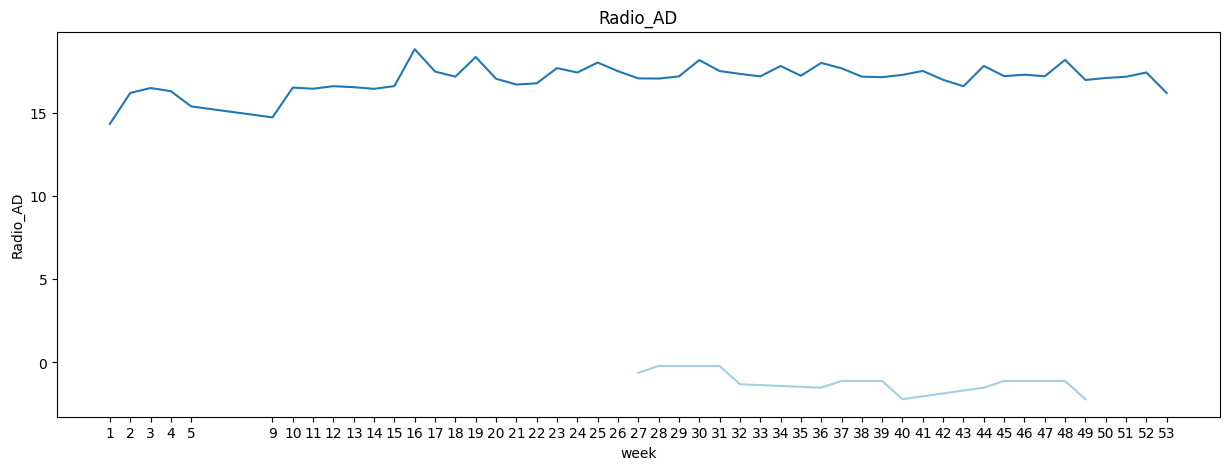

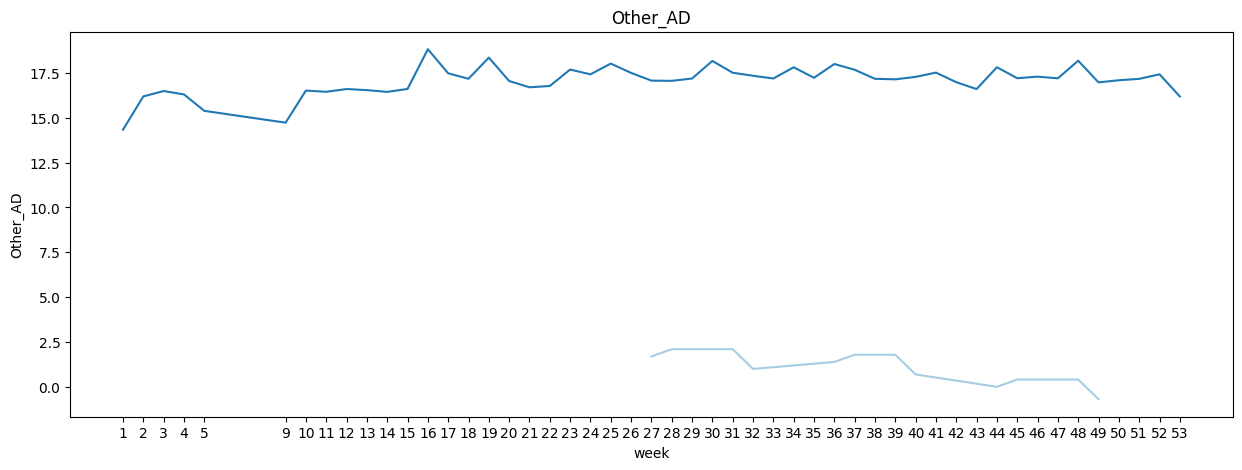

In [80]:
camera.columns
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=camera_wk['week'],y=nm.log(camera_wk[i]))
    sns.lineplot(x=camera_wk['week'],y=nm.log(camera_wk['gmv']))
    plt.xticks(camera_wk['week'])
    x=x+1
    plt.show()



# tv , online marketing , affliates , radio and other doesnt seems impacting the sales much

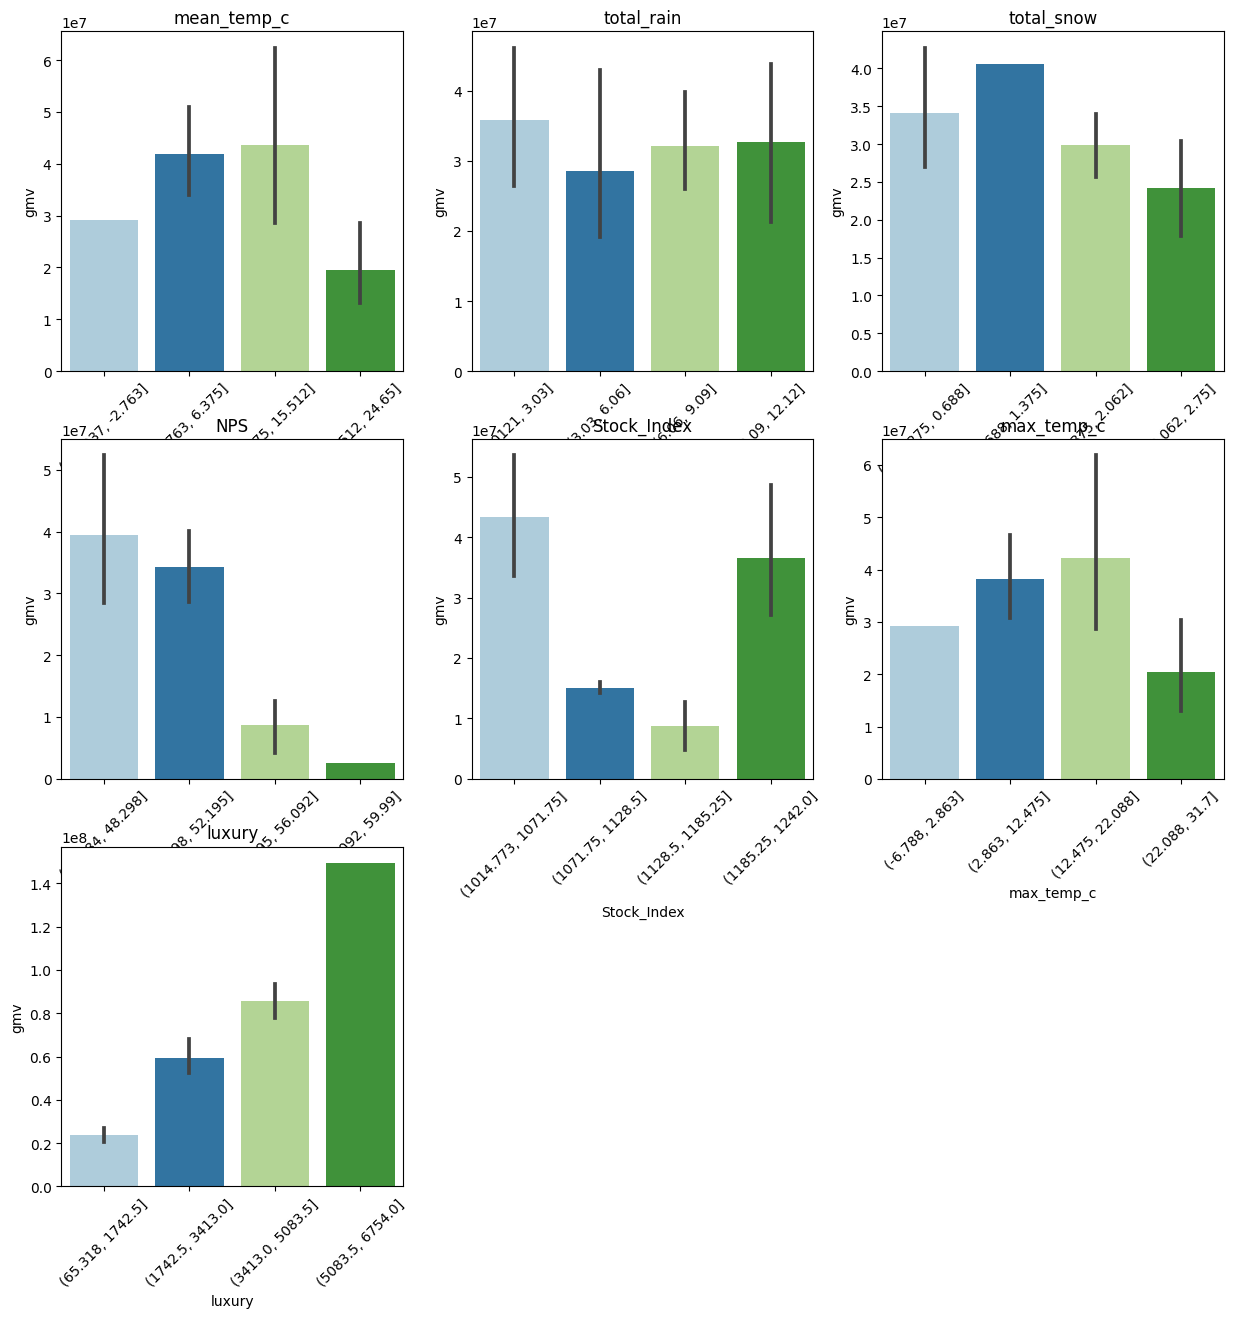

In [81]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c',"luxury"]

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,3,x)
  plt.title(i)
  sns.barplot(y=camera_wk['gmv'],x=pd.cut(camera_wk[i],bins=4))
  plt.xticks(rotation=45)
  x=x+1

## total rain , stock index looks no pattern

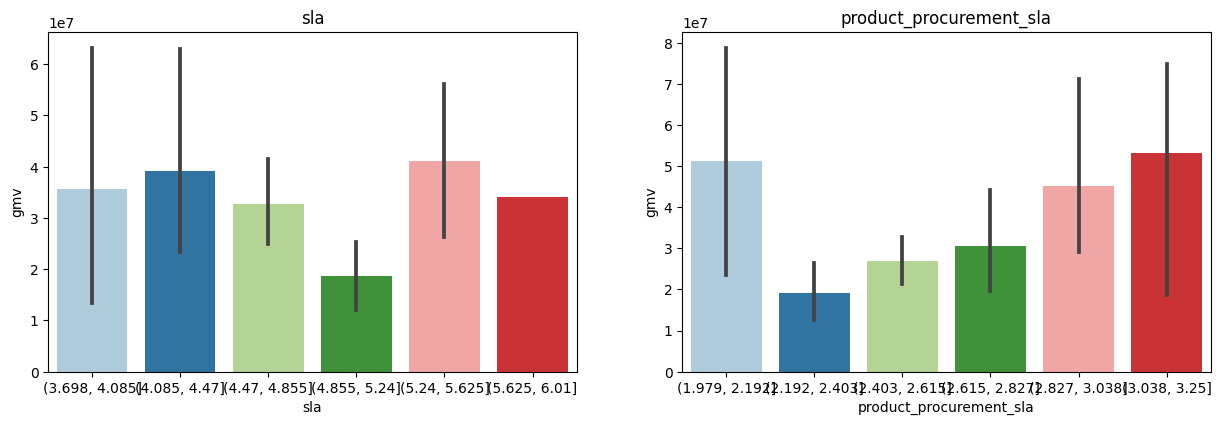

In [82]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=camera_wk['gmv'],x=pd.cut(camera_wk[i],bins=6))
  x=x+1

# product procurement sla has a pattern , less days probably are cheap products and getting sold out at high number and then high priced product
# taking high procurement time and high gmv
# but doesnt look like a reason of impact

In [223]:
camera_wk['sales_per']=(camera_wk['num_of_sales'])/7
camera_wk.drop('num_of_sales',1,inplace=True)

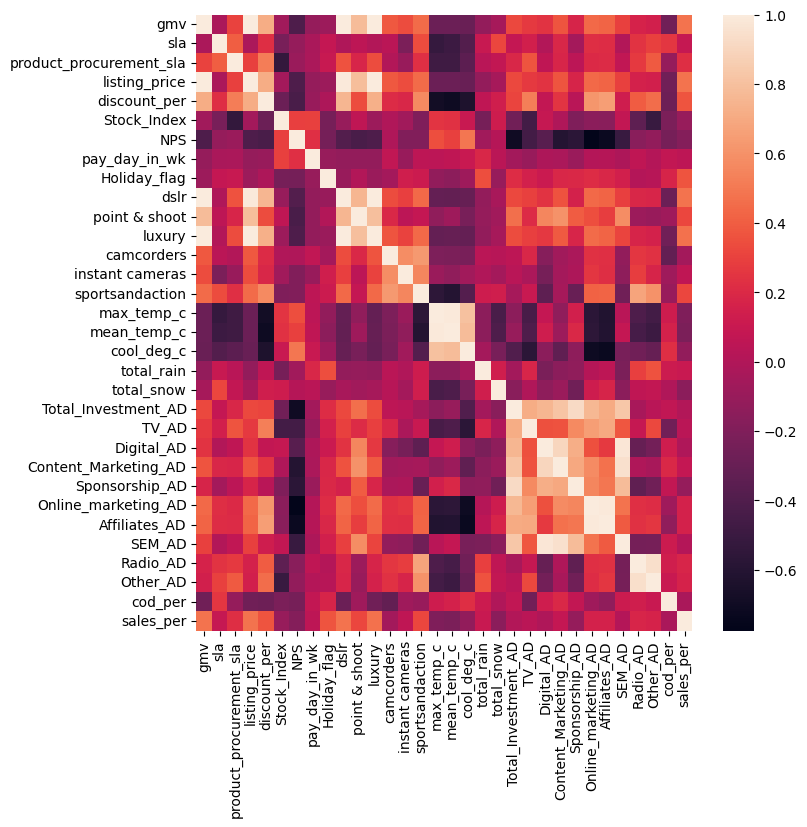

In [111]:
plt.figure(figsize=(8,8))
sns.heatmap(camera_wk.corr())
plt.show()
# camera

In [109]:
camera_wk.corr()[(camera_wk.corr()>0.8)|(camera_wk.corr()<-0.8)]


,gmv,sla,product_procurement_sla,listing_price,discount_per,Stock_Index,NPS,pay_day_in_wk,Holiday_flag,dslr,...,Digital_AD,Content_Marketing_AD,Sponsorship_AD,Online_marketing_AD,Affiliates_AD,SEM_AD,Radio_AD,Other_AD,cod_per,sales_per
gmv,1.000000,NaN,NaN,0.999892,NaN,NaN,NaN,NaN,NaN,0.993619,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sla,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_procurement_sla,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listing_price,0.999892,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.992753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discount_per,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock_Index,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NPS,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pay_day_in_wk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holiday_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dslr,0.993619,NaN,NaN,0.992753,NaN,NaN,NaN,NaN,NaN,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [224]:
camera_wk.columns
camera_wk.drop([ 'Total Investment', 'TV', 'Digital',
       'Sponsorship', 'Content Marketing', 'Online marketing', 'Affiliates',
       'SEM', 'Radio', 'Other'],1,inplace=True)

In [225]:
camera_wk.drop(['NPS','product_procurement_sla','listing_price','Digital_AD','Other_AD','SEM_AD','max_temp_c'],1,inplace=True)

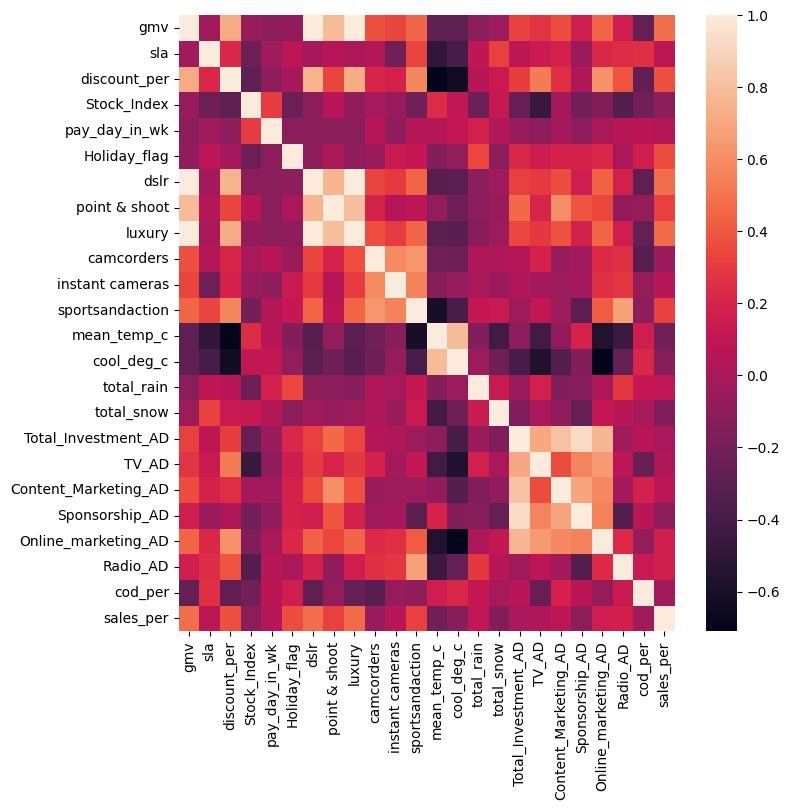

In [115]:
plt.figure(figsize=(8,8))
sns.heatmap(camera_wk.corr())
plt.show()
# camera

In [226]:
camera_wk.drop(['cool_deg_c','cod_per'],1,inplace=True)
camera_wk.drop(['total_snow'],1,inplace=True)

In [936]:
# Till Week 8 , overall investments on Ads were low and also the overall sales, post that it was bit stable. We can remove initial 9 months from analysis for better analysis

# camera_wk=camera_wk[camera_wk.week > 9]

In [657]:
# Now for each category :
# Product : Point & shoot , Camorders , dslt and sportsandaction, Luxury
# Customer : Stock_Index , pay_day,sla and holiday_flag
# Pricing : discount_per, gmv,sales_per
# Ads : Total , TV, Content,Sponsorship, Online, Radio
# Weather : Mean temp and rain

Camera Modeling


In [119]:

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


In [659]:
camera_wk.head()

,week,order_count,gmv,units,sla,product_mrp,product_procurement_sla,listing_price,discount_per,Stock_Index,...,Digital_AD,Content_Marketing_AD,Sponsorship_AD,Online_marketing_AD,Affiliates_AD,SEM_AD,Radio_AD,Other_AD,cod_per,sales_per
6,10,945,14487750.0,1051,4.75,18705065,2.57,14444589.0,231.64,1101.0,...,0.47,0.15,15.80,4.11,1.27,1.80,0.0,0.0,0.712169,0.0
7,11,862,13272812.0,919,4.97,17140423,2.65,13183679.0,195.87,1101.0,...,0.51,0.23,23.55,6.14,1.89,2.33,0.0,0.0,0.699536,0.0
8,12,1036,15918792.5,1042,5.58,21003579,2.42,15874396.0,246.00,1101.0,...,0.51,0.23,23.55,6.14,1.89,2.33,0.0,0.0,0.670849,0.0
9,13,1131,15262029.0,1142,5.10,20883557,2.86,15201956.0,277.22,1101.0,...,0.51,0.23,23.55,6.14,1.89,2.33,0.0,0.0,0.639257,0.0
10,14,1095,13814174.0,1104,4.93,18981617,2.75,13766775.0,271.92,1210.0,...,3.33,0.94,29.02,8.14,2.37,8.76,0.0,0.0,0.672146,0.0


In [227]:
camera_wk.drop(['units','order_count','product_mrp','week'],1,inplace=True)


In [661]:
## dropping other variables who doesnt look like havong an impact from analysis done above
# total rain, nps,tv , online marketing , affliates , radio and other ads doesnt seems impacting the sales much
# camera_wk.drop(['Other_AD','total_rain','listing_price','Others'],1,inplace=True)

In [662]:
# camera_wk.drop('Holiday_flag',1,inplace=True)
# camera_wk.drop('cool_deg_c',1,inplace=True)

In [228]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(camera_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [229]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train

In [230]:
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [128]:
def build_model(X,y):
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary

def checkVIF(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [231]:
## as variables are more than observations check RFE method
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=12, step=1)

In [232]:
selector.fit(X_train, y_train)

# print(selector.support_)
# print(selector.ranking_)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['sla', 'discount_per', 'pay_day_in_wk', 'dslr', 'point & shoot',
       'luxury', 'camcorders', 'total_rain', 'Total_Investment_AD',
       'Content_Marketing_AD', 'Online_marketing_AD', 'sales_per'],
      dtype='object')

In [197]:
list(features)

['sla',
 'discount_per',
 'pay_day_in_wk',
 'num_of_sales',
 'dslr',
 'point & shoot',
 'luxury',
 'camcorders',
 'total_rain',
 'Total_Investment_AD',
 'Content_Marketing_AD',
 'Online_marketing_AD']

In [233]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     3994.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           8.27e-34
Time:                        06:16:05   Log-Likelihood:                 141.74
No. Observations:                  35   AIC:                            -257.5
Df Residuals:                      22   BIC:                            -237.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0126 

,Features,VIF
3,dslr,4780.12
5,luxury,4534.56
1,discount_per,413.32
4,point & shoot,113.56
10,Online_marketing_AD,28.61
8,Total_Investment_AD,23.91
9,Content_Marketing_AD,11.57
0,sla,8.52
6,camcorders,7.83
7,total_rain,3.56


In [234]:
features=features.drop('Total_Investment_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4136.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           3.59e-35
Time:                        06:16:20   Log-Likelihood:                 140.05
No. Observations:                  35   AIC:                            -256.1
Df Residuals:                      23   BIC:                            -237.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0137 

,Features,VIF
3,dslr,4768.58
5,luxury,4509.28
1,discount_per,409.54
4,point & shoot,113.40
9,Online_marketing_AD,19.51
0,sla,8.49
6,camcorders,7.83
8,Content_Marketing_AD,6.44
7,total_rain,3.51
10,sales_per,2.43


In [235]:

features=features.drop('pay_day_in_wk')
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     4728.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           5.28e-37
Time:                        06:16:31   Log-Likelihood:                 139.98
No. Observations:                  35   AIC:                            -258.0
Df Residuals:                      24   BIC:                            -240.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0136 

,Features,VIF
2,dslr,4739.10
4,luxury,4433.55
1,discount_per,403.02
3,point & shoot,112.61
8,Online_marketing_AD,18.19
0,sla,8.47
5,camcorders,7.73
7,Content_Marketing_AD,5.42
6,total_rain,2.98
9,sales_per,2.40


In [236]:
features=features.drop('sales_per',1)
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])



                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5407.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           7.99e-39
Time:                        06:16:36   Log-Likelihood:                 139.77
No. Observations:                  35   AIC:                            -259.5
Df Residuals:                      25   BIC:                            -244.0
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0140 

,Features,VIF
2,dslr,4625.67
4,luxury,4226.75
1,discount_per,402.38
3,point & shoot,111.01
8,Online_marketing_AD,18.16
0,sla,8.46
5,camcorders,6.52
7,Content_Marketing_AD,5.36
6,total_rain,2.73


In [237]:
features=features.drop('camcorders')
X_train_m==build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     5693.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           3.80e-40
Time:                        06:16:49   Log-Likelihood:                 137.92
No. Observations:                  35   AIC:                            -257.8
Df Residuals:                      26   BIC:                            -243.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0138 

,Features,VIF
2,dslr,2838.61
4,luxury,2147.42
1,discount_per,391.03
3,point & shoot,81.88
7,Online_marketing_AD,18.15
0,sla,8.01
6,Content_Marketing_AD,5.36
5,total_rain,2.45


In [238]:
features=features.drop('Online_marketing_AD')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6578.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           6.34e-42
Time:                        06:16:57   Log-Likelihood:                 137.46
No. Observations:                  35   AIC:                            -258.9
Df Residuals:                      27   BIC:                            -246.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0129 

,Features,VIF
2,dslr,2803.91
4,luxury,2142.24
1,discount_per,332.99
3,point & shoot,81.61
0,sla,5.10
6,Content_Marketing_AD,3.24
5,total_rain,2.18


In [246]:
features=features.drop('luxury')
X_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                     6078.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.93e-42
Time:                        06:18:04   Log-Likelihood:                 132.74
No. Observations:                  35   AIC:                            -251.5
Df Residuals:                      28   BIC:                            -240.6
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0148 

,Features,VIF
1,discount_per,149.78
2,dslr,100.58
3,point & shoot,14.41
5,Content_Marketing_AD,3.02
0,sla,2.87
4,total_rain,1.76


In [247]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
cam_model1=lm.params

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              9597.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                    1.92e-46
Time:                        06:18:09   Log-Likelihood:                          125.32
No. Observations:                  35   AIC:                                     -238.6
Df Residuals:                      29   BIC:                                     -229.3
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

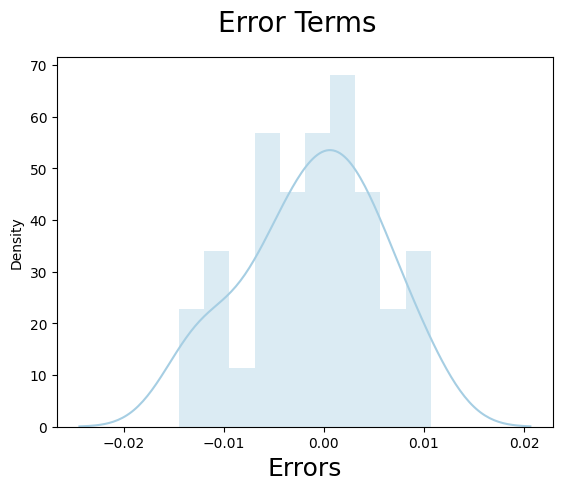

In [248]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


Text(0, 0.5, 'y_pred')

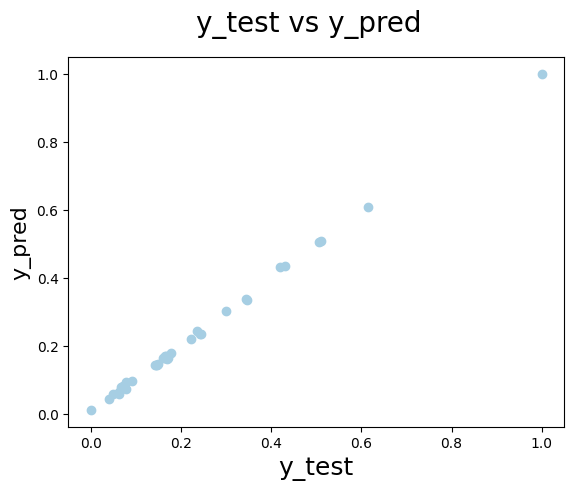

In [249]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)

In [250]:
## on test
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]

In [251]:
y_test_pred=lm.predict(X_test)

Text(0, 0.5, 'y_test_pred')

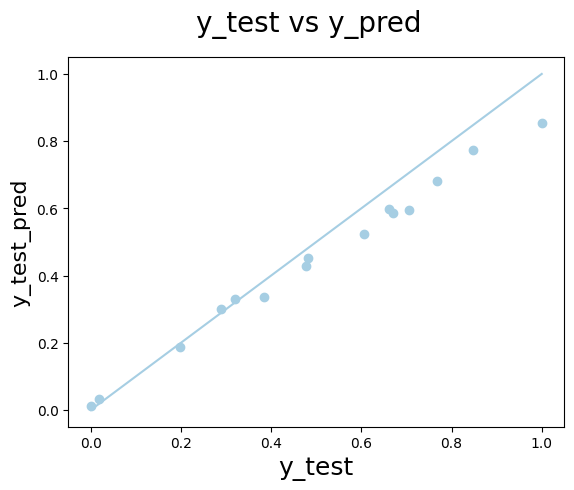

In [252]:
# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

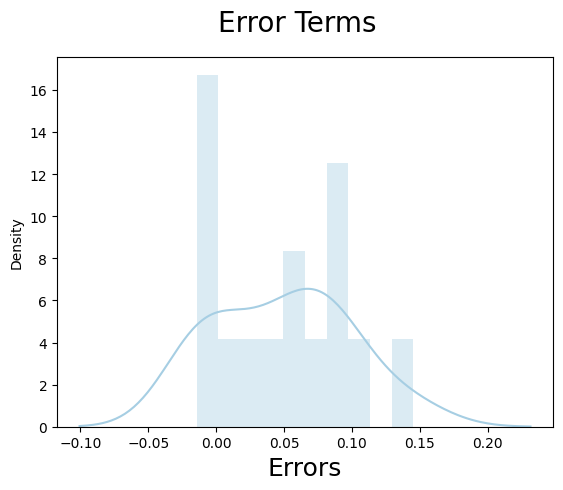

In [253]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


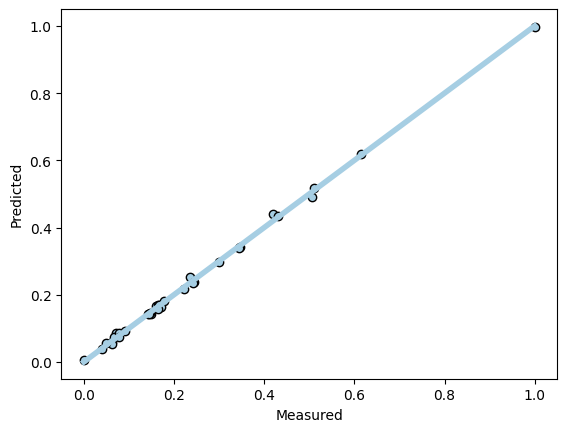

In [254]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [255]:
cam_feat=features

In [256]:
cam_model1_x=pd.DataFrame(cam_model1)

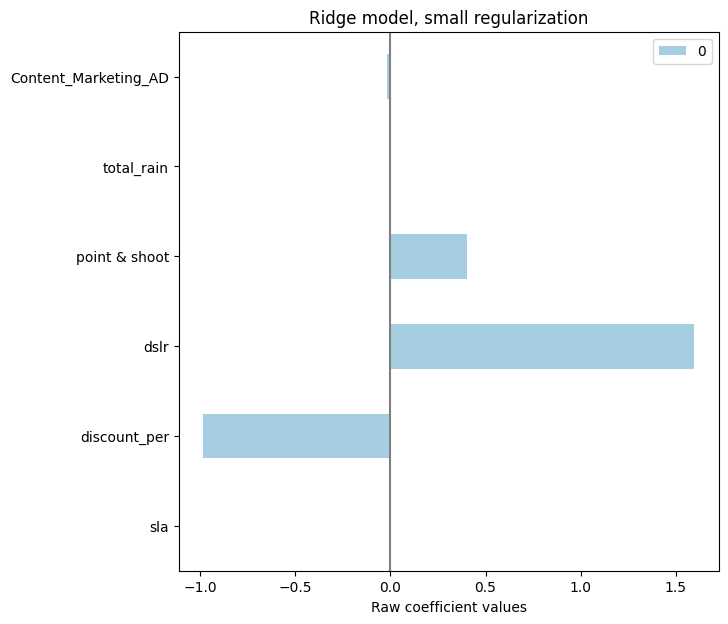

In [258]:
cam_model1_x.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

Multiplicative

In [695]:

# camera_wk=camera.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
#                                         'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
#                                          'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
#                                           'sale_date':"nunique"}).round(2)

# camera_wk=pd.merge(camera_wk,weekly_kpis,on='week')


# camera_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
#        'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

# # camera_wk.sale_date.value_counts()
# camera_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
# camera_wk["cod_per"]=camera_wk["order_payment_cod"]/camera_wk["order_count"]
# camera_wk.drop("order_payment_cod",1,inplace=True)
# camera_wk.rename(columns={"sale_date":"num_of_sales"},inplace=True)
# camera_wk['sales_per']=((camera_wk['num_of_sales']-1)/7)*100
# camera_wk.drop('num_of_sales',1,inplace=True)

In [696]:

# camera_wk.drop(['units','order_count','product_mrp'],1,inplace=True)
# camera_wk.drop(['Other_AD','Radio_AD','Online_marketing_AD','Affiliates_AD','total_rain','NPS'],1,inplace=True)
# camera_wk.drop(['sla','product_procurement_sla'],1,inplace=True)
# camera_wk.drop('cool_deg_c',1,inplace=True)

In [259]:
camera_wk[camera_wk.columns]=nm.log(camera_wk[camera_wk.columns])
# camera_wk.columns

In [260]:
camera_wk.describe()

camera_wk=camera_wk.replace([nm.inf, -nm.inf], 0)
camera_wk=camera_wk.fillna(0)



In [261]:
df_train, df_test = train_test_split(camera_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

In [262]:
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)
# X_train.columns
#
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['sla', 'discount_per', 'Holiday_flag', 'dslr', 'point & shoot',
       'luxury', 'camcorders', 'sportsandaction', 'total_rain',
       'Total_Investment_AD', 'TV_AD', 'Content_Marketing_AD',
       'Online_marketing_AD', 'Affiliates_AD', 'sales_per'],
      dtype='object')

In [263]:
m1=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     925.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           6.03e-24
Time:                        06:19:16   Log-Likelihood:                 121.87
No. Observations:                  35   AIC:                            -211.7
Df Residuals:                      19   BIC:                            -186.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0124 

,Features,VIF
13,Affiliates_AD,26071.00
12,Online_marketing_AD,24305.47
5,luxury,2490.74
3,dslr,1626.36
1,discount_per,839.01
10,TV_AD,625.12
9,Total_Investment_AD,476.44
4,point & shoot,72.33
6,camcorders,46.53
7,sportsandaction,36.16


In [264]:
features=features.drop('Holiday_flag',1)
m1=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1043.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.83e-25
Time:                        06:19:37   Log-Likelihood:                 121.86
No. Observations:                  35   AIC:                            -213.7
Df Residuals:                      20   BIC:                            -190.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0131 

,Features,VIF
12,Affiliates_AD,25459.89
11,Online_marketing_AD,23592.89
4,luxury,2389.91
2,dslr,1621.09
1,discount_per,826.88
9,TV_AD,623.42
8,Total_Investment_AD,443.32
3,point & shoot,69.34
5,camcorders,46.10
6,sportsandaction,32.46


In [265]:
features=features.drop('sportsandaction',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1177.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           5.24e-27
Time:                        06:19:50   Log-Likelihood:                 121.83
No. Observations:                  35   AIC:                            -215.7
Df Residuals:                      21   BIC:                            -193.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0138 

,Features,VIF
11,Affiliates_AD,22720.26
10,Online_marketing_AD,20651.67
4,luxury,2384.11
2,dslr,1508.23
1,discount_per,797.76
8,TV_AD,596.46
7,Total_Investment_AD,388.46
3,point & shoot,66.12
5,camcorders,33.74
9,Content_Marketing_AD,24.35


In [266]:
features=features.drop('Total_Investment_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1328.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.49e-28
Time:                        06:20:02   Log-Likelihood:                 121.72
No. Observations:                  35   AIC:                            -217.4
Df Residuals:                      22   BIC:                            -197.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0149 

,Features,VIF
10,Affiliates_AD,8453.02
9,Online_marketing_AD,6816.36
4,luxury,2161.13
2,dslr,1382.99
1,discount_per,781.64
7,TV_AD,131.86
3,point & shoot,64.54
5,camcorders,33.06
0,sla,19.15
8,Content_Marketing_AD,13.69


In [267]:
features=features.drop('Affiliates_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1426.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           7.39e-30
Time:                        06:20:11   Log-Likelihood:                 120.66
No. Observations:                  35   AIC:                            -217.3
Df Residuals:                      23   BIC:                            -198.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -5.637e-05 

,Features,VIF
4,luxury,2094.91
2,dslr,1360.05
1,discount_per,672.45
9,Online_marketing_AD,123.74
7,TV_AD,91.87
3,point & shoot,64.39
5,camcorders,32.87
0,sla,17.09
8,Content_Marketing_AD,13.52
10,sales_per,10.69


In [268]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1594.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.41e-31
Time:                        06:20:24   Log-Likelihood:                 120.21
No. Observations:                  35   AIC:                            -218.4
Df Residuals:                      24   BIC:                            -201.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0041 

,Features,VIF
4,luxury,2089.84
2,dslr,1359.95
1,discount_per,668.53
9,Online_marketing_AD,123.08
7,TV_AD,77.93
3,point & shoot,63.59
5,camcorders,26.82
8,Content_Marketing_AD,13.02
0,sla,11.76
6,total_rain,7.79


In [269]:
features=features.drop('camcorders',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1845.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           5.42e-33
Time:                        06:20:33   Log-Likelihood:                 120.21
No. Observations:                  35   AIC:                            -220.4
Df Residuals:                      25   BIC:                            -204.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0041 

,Features,VIF
4,luxury,1634.23
2,dslr,1356.52
1,discount_per,424.51
8,Online_marketing_AD,121.98
6,TV_AD,77.87
3,point & shoot,63.47
7,Content_Marketing_AD,10.67
0,sla,10.37
5,total_rain,7.69


In [270]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2077.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.84e-34
Time:                        06:20:48   Log-Likelihood:                 119.54
No. Observations:                  35   AIC:                            -221.1
Df Residuals:                      26   BIC:                            -207.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0012 

,Features,VIF
4,luxury,1608.81
2,dslr,1338.43
1,discount_per,368.94
3,point & shoot,63.25
6,TV_AD,19.88
7,Content_Marketing_AD,10.65
0,sla,9.71
5,total_rain,7.58


In [271]:
features=features.drop('sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2408.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           4.87e-36
Time:                        06:20:55   Log-Likelihood:                 119.12
No. Observations:                  35   AIC:                            -222.2
Df Residuals:                      27   BIC:                            -209.8
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0024 

,Features,VIF
3,luxury,1505.38
1,dslr,1131.28
0,discount_per,344.39
2,point & shoot,59.28
5,TV_AD,13.60
6,Content_Marketing_AD,9.95
4,total_rain,6.86


In [272]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     2753.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.89e-37
Time:                        06:21:08   Log-Likelihood:                 118.14
No. Observations:                  35   AIC:                            -222.3
Df Residuals:                      28   BIC:                            -211.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0094      0.010     -0.928

,Features,VIF
3,luxury,1503.57
1,dslr,1086.22
0,discount_per,320.28
2,point & shoot,54.65
5,TV_AD,13.59
4,total_rain,5.46


In [273]:
features=features.drop('total_rain',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     3137.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.07e-38
Time:                        06:21:16   Log-Likelihood:                 116.62
No. Observations:                  35   AIC:                            -221.2
Df Residuals:                      29   BIC:                            -211.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0023      0.007      0.311

,Features,VIF
3,luxury,1285.74
1,dslr,910.28
0,discount_per,319.35
2,point & shoot,43.35
4,TV_AD,11.97


In [290]:
lm_m = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm_m.summary()) # model summary
y_train_pred=lm_m.predict(X_train[features])
cam_features1=features
cam_model2=lm_m

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          2.570e+04
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                    1.63e-53
Time:                        06:23:42   Log-Likelihood:                          116.56
No. Observations:                  35   AIC:                                     -223.1
Df Residuals:                      30   BIC:                                     -215.3
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Mean_Squared_Error : 7.497567090281535e-05
r_square_value : 0.9981480864352477


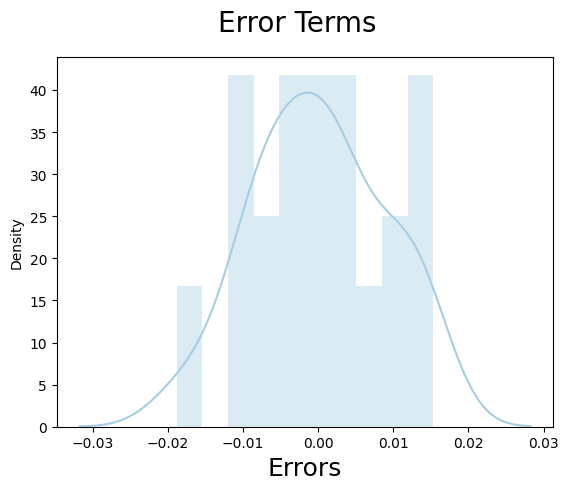

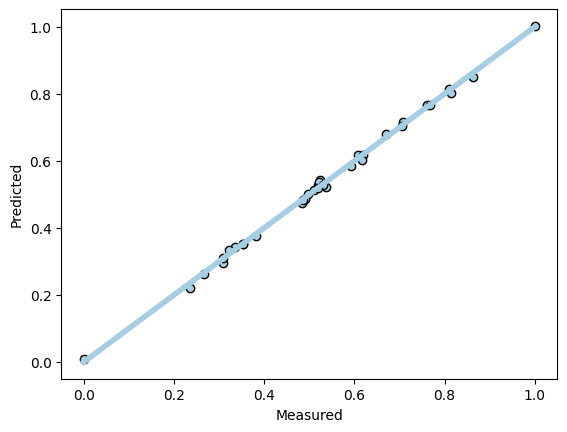

In [275]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train, y_train_pred)
r_squared = r2_score(y_train, y_train_pred)
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


fig, ax = plt.subplots()
ax.scatter(y_train, y_train_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [276]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)
scores


array([0.9937479 , 0.99957992, 0.99119554, 0.99826703, 0.99618264,
       0.99629403, 0.99228761, 0.98563937, 0.98665306, 0.99640583])

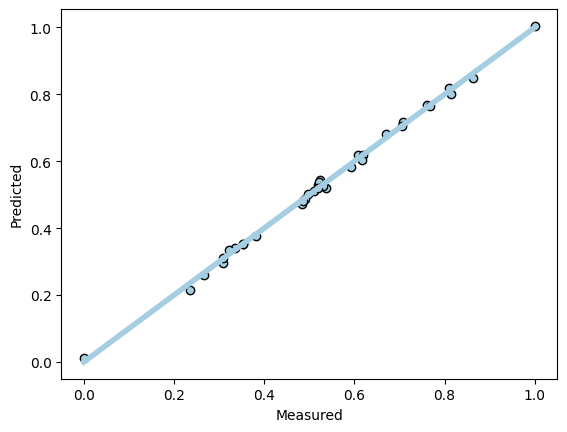

In [277]:

fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [278]:
df_test[df_test.columns]=scaler.fit_transform(df_test[df_test.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']


In [279]:
y_test_pred= lm_m.predict(X_test[features])

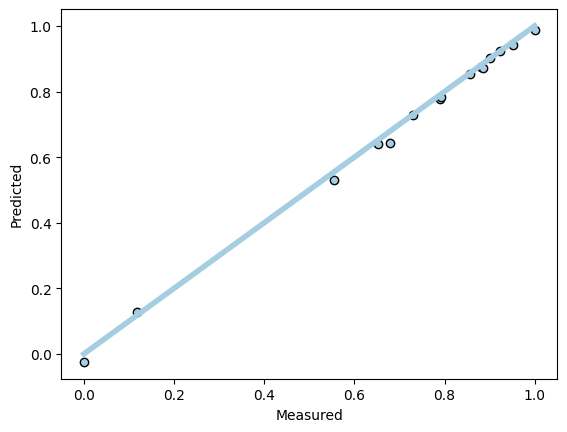

In [280]:
y_test.min()
y_test.max()
fig, ax = plt.subplots()
ax.scatter(y_test, y_test_pred, edgecolors=(0, 0, 0))
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

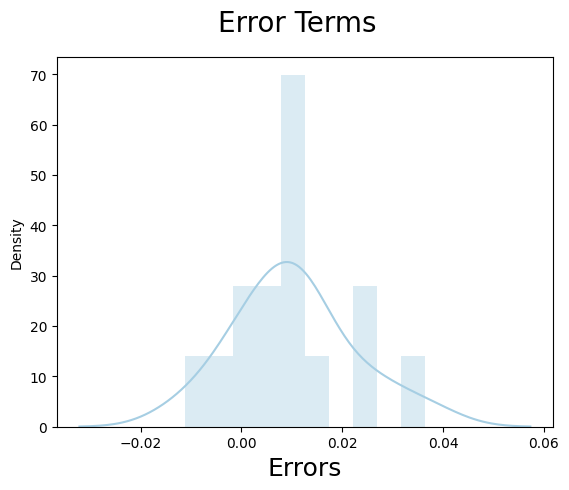

In [281]:
fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

In [292]:
cam_features2=pd.DataFrame(cam_model2.params)

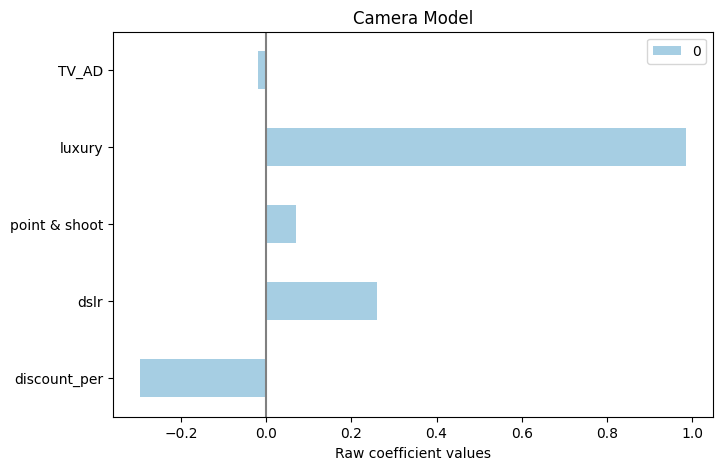

In [300]:
cam_features2.plot.barh(figsize=(10, 5))
plt.title("Camera Model")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

# Home Audio

In [301]:
##
ha=EleData3[EleData3.product_analytic_sub_category=='homeaudio']
# camera.discount_per
# EleData3.product_analytic_sub_category.value_counts()

In [ ]:
+

In [302]:
ha.isnull().sum()
## analysis and all pending
ha_dummies=pd.get_dummies(ha.product_analytic_vertical)
ha=pd.concat([ha,ha_dummies],axis=1)

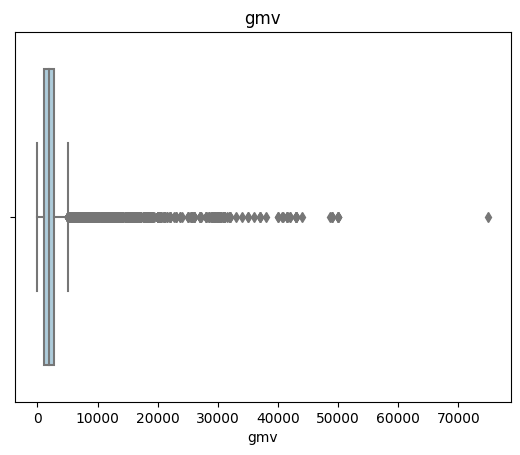

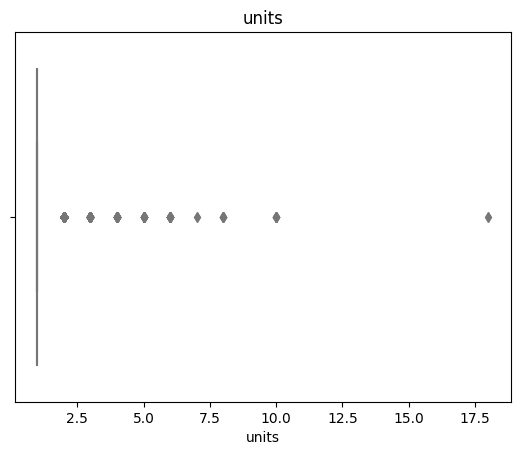

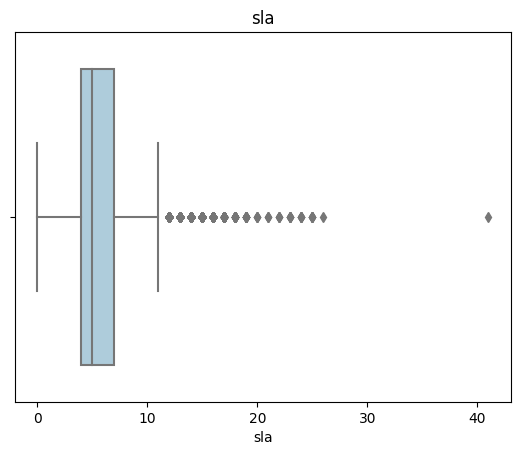

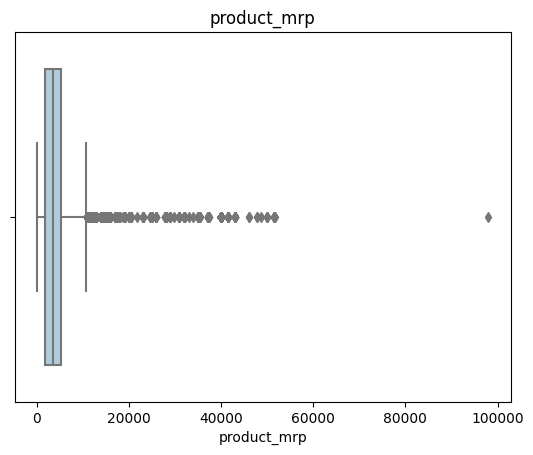

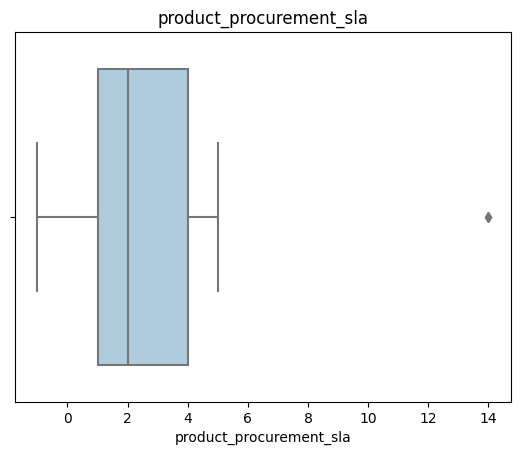

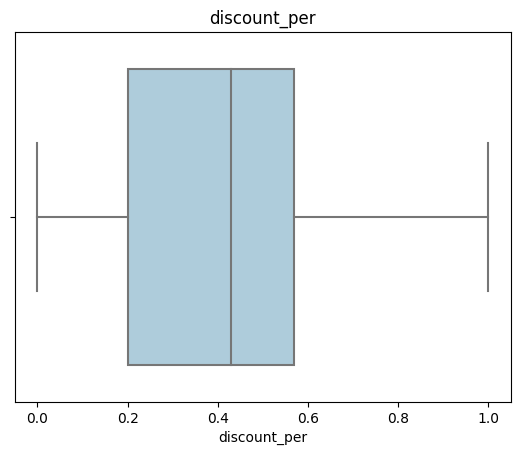

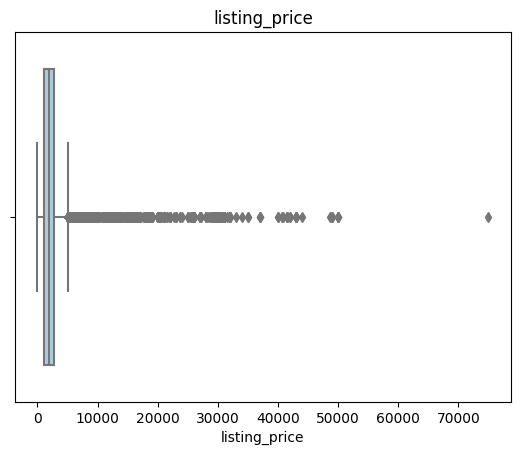

In [303]:
for i in num:
  sns.boxplot(x=ha[i])
  plt.title(i)
  plt.show()


In [304]:


# q1=ha['product_mrp'].quantile(0.25)
# q3=ha['product_mrp'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# # ha[ha['product_mrp']>112000]
# ha.loc[ha['product_mrp']>up,'product_mrp']=up
# ha.loc[ha['product_mrp']<lw,'product_mrp']=lw


# q1=ha['gmv'].quantile(0.25)
# q3=ha['gmv'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# ha.loc[ha['gmv']>up,'gmv']=up
# ha.loc[ha['gmv']<lw,'gmv']=lw


# q1=ha['listing_price'].quantile(0.25)
# q3=ha['listing_price'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# ha.loc[ha['listing_price']>up,'listing_price']=up
# ha.loc[ha['listing_price']<lw,'listing_price']=lw


# q1=ha['discount_per'].quantile(0.25)
# q3=ha['discount_per'].quantile(0.75)
# iqr=q3-q1
# lw=q1-iqr*1.5
# up=q3+iqr*1.5
# print(lw," ",up)
# ha.loc[ha['discount_per']>up,'discount_per']=up
# ha.loc[ha['discount_per']<lw,'discount_per']=lw

# ha[ha['discount_per']>1.39]
q1=ha['sla'].quantile(0.25)
q3=ha['sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['sla']>up,'sla']=up
ha.loc[ha['sla']<lw,'sla']=lw
q1=ha['product_procurement_sla'].quantile(0.25)
q3=ha['product_procurement_sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
ha.loc[ha['product_procurement_sla']>up,'product_procurement_sla']=up
ha.loc[ha['product_procurement_sla']<lw,'product_procurement_sla']=lw

-0.5   11.5
-3.5   8.5


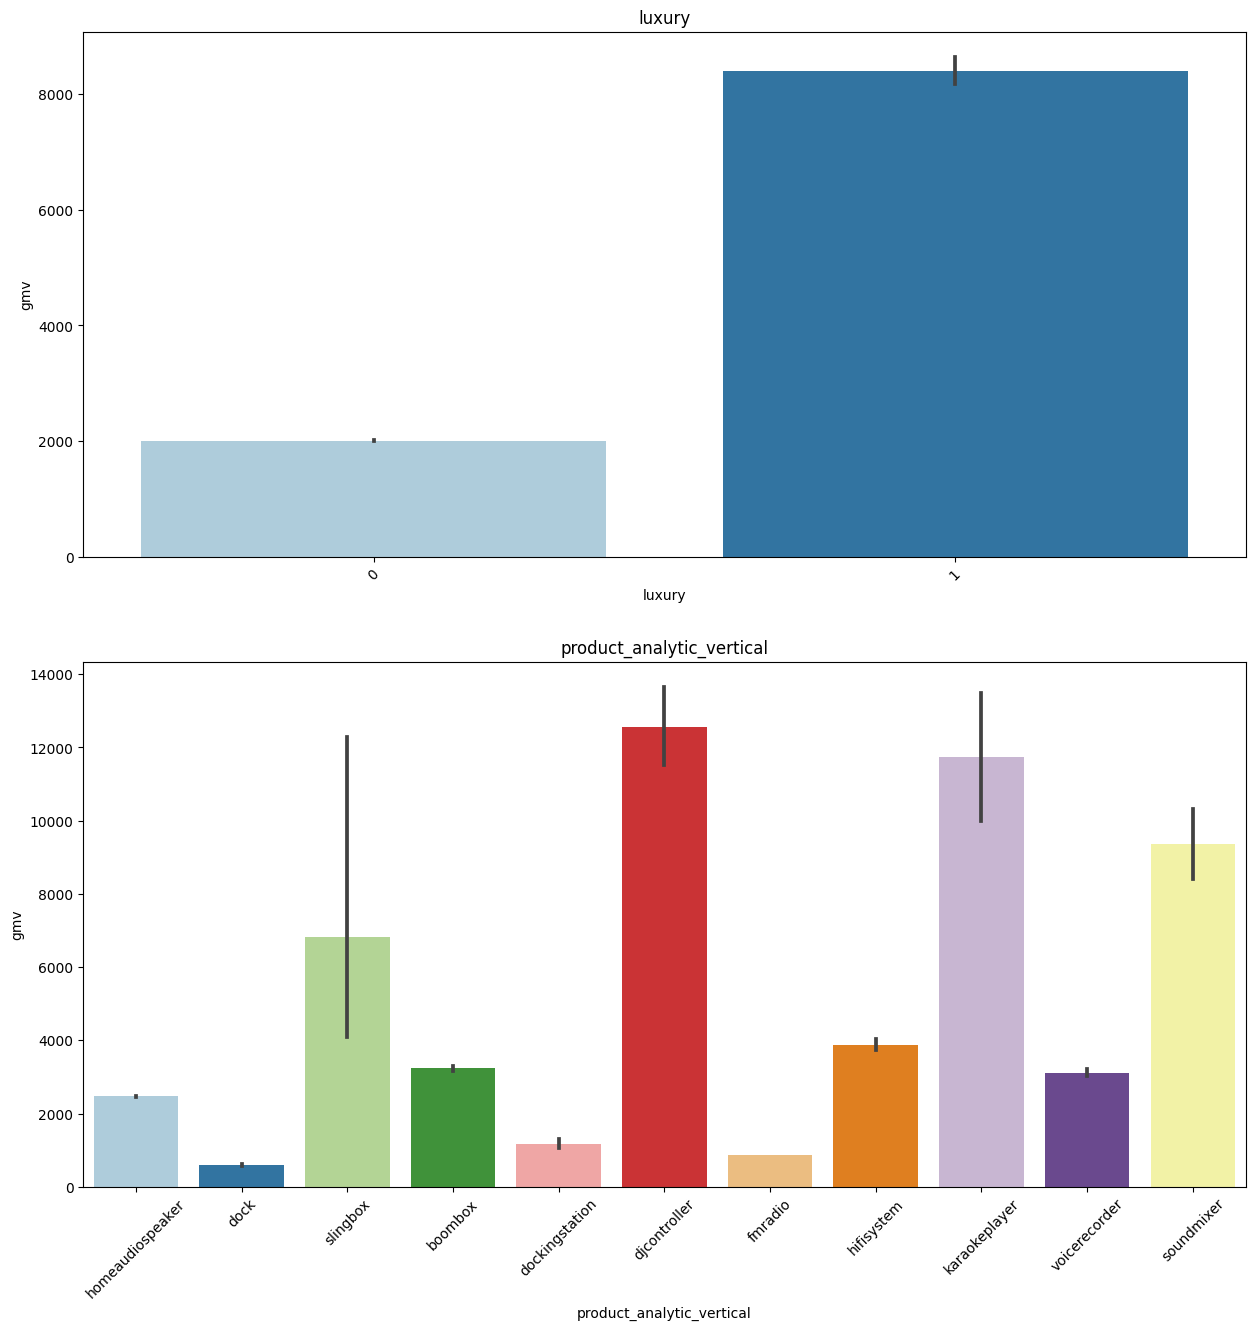

In [320]:
p = ['luxury','product_analytic_vertical']

plt.figure(figsize=(15, 15))
x=1
for i in p:
  plt.subplot(2,1,x)
  plt.title(i)
  sns.barplot(y=ha['gmv'],x=ha[i])
  plt.xticks(rotation=45)
  x=x+1

## product procurement sla has a impact

In [305]:
ha.columns

Index(['order_date', 'Month', 'order_item_id', 'gmv', 'units',
       'order_payment_type', 'sla', 'product_analytic_category',
       'product_analytic_sub_category', 'product_analytic_vertical',
       'product_mrp', 'product_procurement_sla',
       'product_analytic_vertical_derived', 'week', 'listing_price',
       'discount_per', 'sale_date', 'Stock_Index', 'NPS', 'Year',
       'pay_date_flag', 'Holiday_flag', 'luxury', 'boombox', 'djcontroller',
       'dock', 'dockingstation', 'fmradio', 'hifisystem', 'homeaudiospeaker',
       'karaokeplayer', 'slingbox', 'soundmixer', 'voicerecorder'],
      dtype='object')

In [306]:

ha_wk=ha.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique","fmradio":"sum","homeaudiospeaker":"sum",
                                'luxury':'sum', 'boombox':'sum', 'djcontroller':'sum','dock':'sum', 'dockingstation':'sum', 'fmradio':'sum', 'hifisystem':'sum', 'homeaudiospeaker':'sum',
                                'karaokeplayer':'sum', 'slingbox':'sum', 'soundmixer':'sum', 'voicerecorder':'sum'}).round(2)

ha_wk=pd.merge(ha_wk,weekly_kpis,on='week')

ha_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

ha_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

ha_wk.order_payment_type.value_counts()
ha_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
ha_wk["cod_per"]=ha_wk["order_payment_cod"]/ha_wk["order_count"]
ha_wk.drop("order_payment_cod",1,inplace=True)
ha_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)


In [307]:
ha_wk['sales_per']=(ha_wk['num_of_sales']-1)/7
ha_wk.drop('num_of_sales',1,inplace=True)

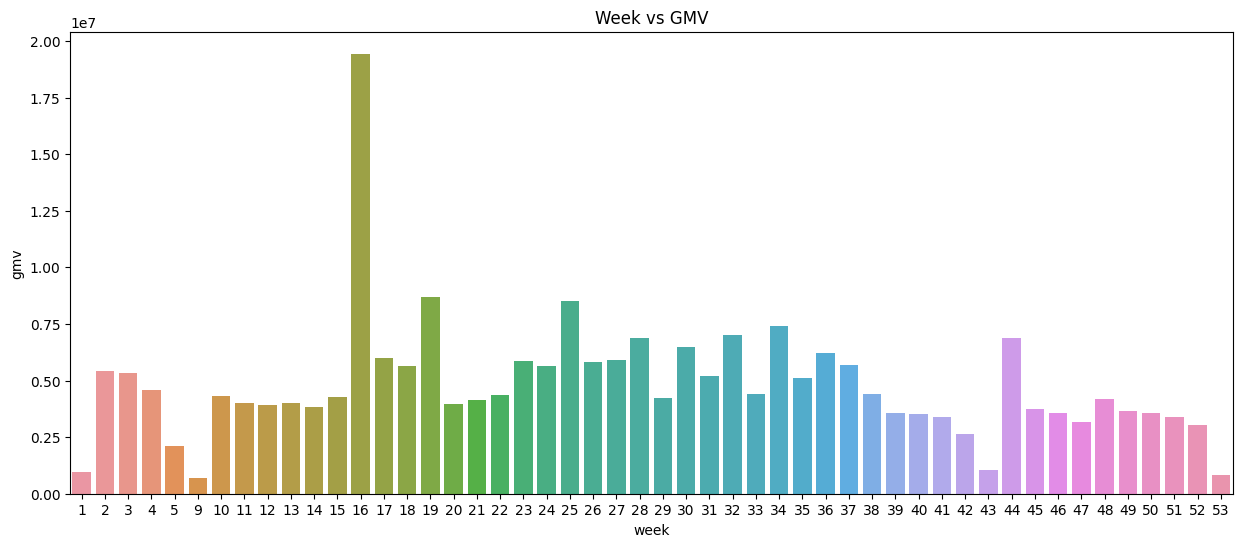

In [308]:
plt.figure(figsize=(15,6))
sns.barplot(x=ha_wk['week'],y=ha_wk['gmv'])
plt.title("Week vs GMV")
plt.show()

### 16 , 19 , 25, 30 ,32,34  ,44 week

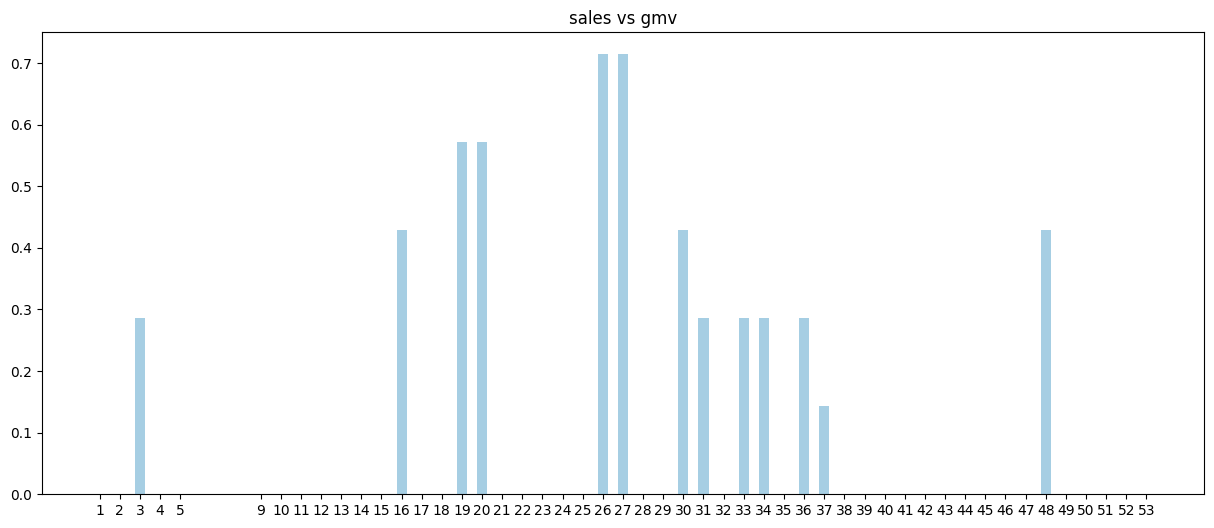

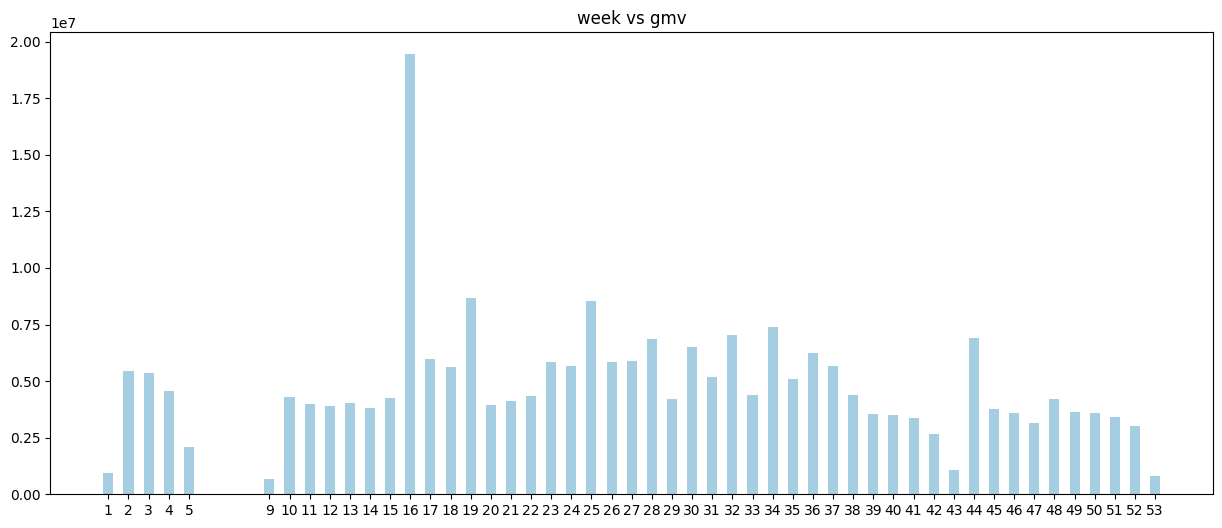

In [309]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=ha_wk['week'],height=ha_wk['sales_per'],width=width)
plt.xticks(ha_wk['week'])
plt.title('sales vs gmv')
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=ha_wk['week'],height=ha_wk['gmv'],width=width)
plt.xticks(ha_wk['week'])
plt.title('week vs gmv')
plt.show()


## sales 16 , 19, 20, 26,27,30,31, 33,34,48
## doesnt have much impact specially week 20 ,33,34 etc

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(x=ha_wk['week'],height=ha_wk['discount_per'])
plt.xticks(ha_wk['week'])
plt.show()

# 16,19,23,25,28,30,32,34,44
## impacting gmv

In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=ha_wk['week'],y=ha_wk['gmv'],hue=ha_wk['Holiday_flag'])
plt.xticks(ha_wk['week'])
plt.show()


In [ ]:
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=ha_wk['week'],y=nm.log(ha_wk[i]))
    sns.lineplot(x=ha_wk['week'],y=nm.log(ha_wk['gmv']))
    plt.xticks(ha_wk['week'])
    x=x+1
    plt.show()

## radio , other , conent , digital and total : not required



In [ ]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=ha_wk['gmv'],x=pd.cut(ha_wk[i],bins=4))
  x=x+1


# max and mean almost same impact : so max temp can be remobed

In [ ]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=ha_wk['gmv'],x=pd.cut(ha_wk[i],bins=4))
  x=x+1

## product procurement sla has a impact

In [321]:
ha_wk.drop(["units","order_count","product_mrp"],1,inplace=True)


In [322]:
ha_wk.drop(['Other_AD'],1,inplace=True)

In [332]:
ha_wk.corr()[(ha_wk.corr()>0.9)|(ha_wk.corr()<-0.9)]

,week,gmv,sla,product_procurement_sla,listing_price,discount_per,Stock_Index,NPS,pay_day_in_wk,Holiday_flag,...,TV_AD,Digital_AD,Content_Marketing_AD,Sponsorship_AD,Online_marketing_AD,Affiliates_AD,SEM_AD,Radio_AD,cod_per,sales_per
week,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gmv,NaN,1.000000,NaN,NaN,0.999987,0.985769,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sla,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
product_procurement_sla,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
listing_price,NaN,0.999987,NaN,NaN,1.000000,0.985750,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
discount_per,NaN,0.985769,NaN,NaN,0.985750,1.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stock_Index,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pay_day_in_wk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Holiday_flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [333]:
ha_wk.drop(['listing_price','SEM_AD'],1,inplace=True)

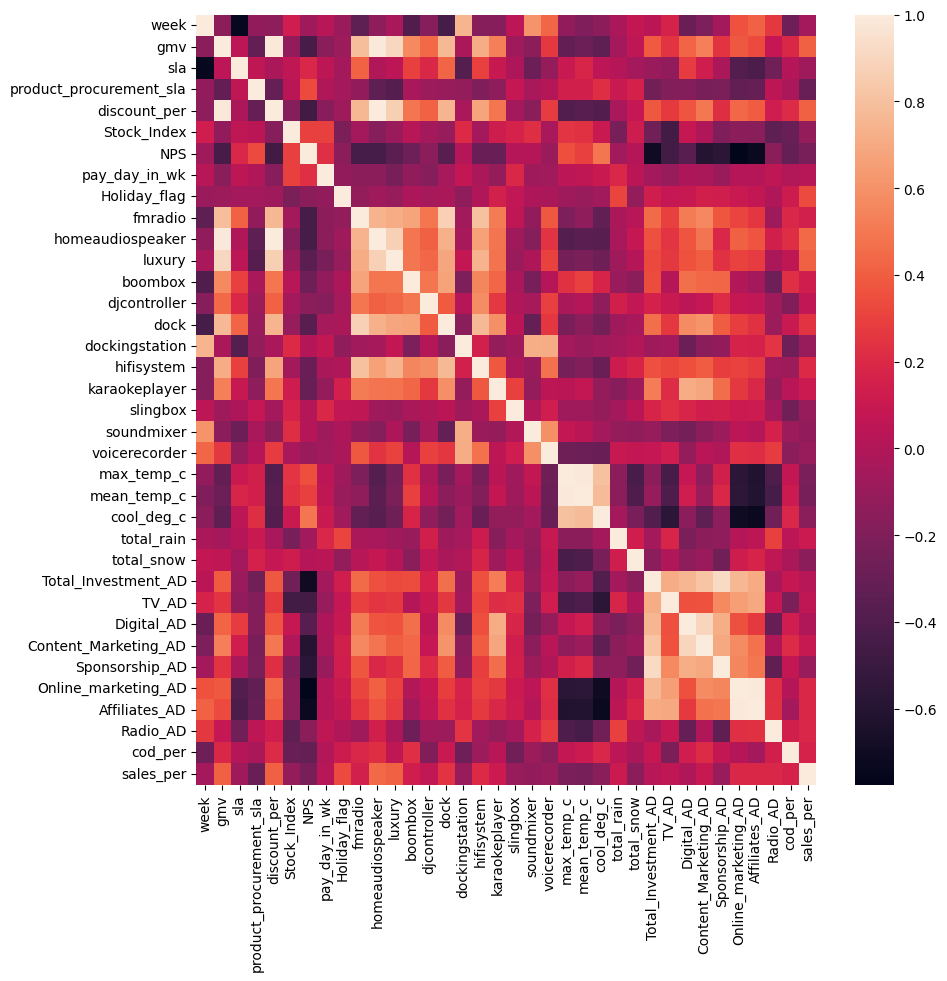

In [334]:
plt.figure(figsize=(10,10))
sns.heatmap(ha_wk.corr())
plt.show()
# camera

In [337]:
ha_wk.drop(['max_temp_c','NPS','Total_Investment_AD'],1,inplace=True)

In [338]:

df_train, df_test = train_test_split(ha_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)

# print(selector.support_)
# print(selector.ranking_)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features



Index(['product_procurement_sla', 'discount_per', 'Stock_Index',
       'pay_day_in_wk', 'fmradio', 'homeaudiospeaker', 'luxury', 'boombox',
       'djcontroller', 'dock', 'hifisystem', 'karaokeplayer', 'Digital_AD',
       'Content_Marketing_AD', 'sales_per'],
      dtype='object')

In [339]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     847.0
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.39e-23
Time:                        06:43:35   Log-Likelihood:                 128.76
No. Observations:                  35   AIC:                            -225.5
Df Residuals:                      19   BIC:                            -200.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
1,discount_per,478.28
5,homeaudiospeaker,453.06
4,fmradio,38.89
6,luxury,26.69
9,dock,20.32
10,hifisystem,17.99
13,Content_Marketing_AD,15.76
12,Digital_AD,15.54
0,product_procurement_sla,9.35
7,boombox,8.44


In [341]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     954.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           4.42e-25
Time:                        06:43:55   Log-Likelihood:                 128.74
No. Observations:                  35   AIC:                            -227.5
Df Residuals:                      20   BIC:                            -204.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
5,homeaudiospeaker,417.43
1,discount_per,409.77
4,fmradio,38.86
6,luxury,24.50
9,dock,20.16
10,hifisystem,17.95
0,product_procurement_sla,9.30
7,boombox,8.42
8,djcontroller,6.40
2,Stock_Index,5.48


In [342]:
features=features.drop('djcontroller',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1070.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.43e-26
Time:                        06:44:16   Log-Likelihood:                 128.59
No. Observations:                  35   AIC:                            -229.2
Df Residuals:                      21   BIC:                            -207.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
5,homeaudiospeaker,417.26
1,discount_per,409.53
4,fmradio,37.30
6,luxury,23.43
8,dock,18.60
9,hifisystem,15.78
0,product_procurement_sla,8.99
7,boombox,7.49
2,Stock_Index,5.41
10,karaokeplayer,3.91


In [343]:
features=features.drop('dock',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1196.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           4.69e-28
Time:                        06:44:35   Log-Likelihood:                 128.32
No. Observations:                  35   AIC:                            -230.6
Df Residuals:                      22   BIC:                            -210.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
5,homeaudiospeaker,372.30
1,discount_per,359.21
4,fmradio,30.61
6,luxury,23.43
8,hifisystem,15.73
0,product_procurement_sla,8.95
7,boombox,7.18
2,Stock_Index,4.88
9,karaokeplayer,3.67
10,Digital_AD,3.02


In [344]:
features=features.drop('pay_day_in_wk',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1278.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.59e-29
Time:                        06:44:44   Log-Likelihood:                 127.19
No. Observations:                  35   AIC:                            -230.4
Df Residuals:                      23   BIC:                            -211.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
4,homeaudiospeaker,360.49
1,discount_per,354.26
3,fmradio,29.87
5,luxury,16.61
7,hifisystem,10.69
0,product_procurement_sla,8.95
6,boombox,6.77
2,Stock_Index,4.03
8,karaokeplayer,3.60
9,Digital_AD,2.96


In [345]:
features=features.drop('hifisystem',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1405.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.09e-30
Time:                        06:44:55   Log-Likelihood:                 126.44
No. Observations:                  35   AIC:                            -230.9
Df Residuals:                      24   BIC:                            -213.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
4,homeaudiospeaker,358.96
1,discount_per,352.05
3,fmradio,22.53
5,luxury,14.67
0,product_procurement_sla,8.78
6,boombox,6.76
2,Stock_Index,4.03
7,karaokeplayer,3.49
8,Digital_AD,2.94
9,sales_per,2.24


In [346]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     1494.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           7.50e-32
Time:                        06:45:05   Log-Likelihood:                 124.96
No. Observations:                  35   AIC:                            -229.9
Df Residuals:                      25   BIC:                            -214.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
1,discount_per,324.45
4,homeaudiospeaker,316.42
3,fmradio,21.89
5,luxury,14.19
0,product_procurement_sla,8.78
6,boombox,6.74
2,Stock_Index,4.01
7,karaokeplayer,3.31
8,Digital_AD,2.87


In [347]:
features=features.drop('homeaudiospeaker',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     406.6
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.68e-25
Time:                        06:45:22   Log-Likelihood:                 99.542
No. Observations:                  35   AIC:                            -181.1
Df Residuals:                      26   BIC:                            -167.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
3,fmradio,19.69
1,discount_per,16.19
4,luxury,13.88
0,product_procurement_sla,8.69
5,boombox,6.43
2,Stock_Index,3.90
6,karaokeplayer,3.30
7,Digital_AD,2.85


In [348]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     477.0
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.37e-26
Time:                        06:45:34   Log-Likelihood:                 99.337
No. Observations:                  35   AIC:                            -182.7
Df Residuals:                      27   BIC:                            -170.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0088      0.010      0.854

,Features,VIF
2,fmradio,16.89
0,discount_per,15.32
3,luxury,13.39
4,boombox,6.20
1,Stock_Index,3.11
5,karaokeplayer,2.88
6,Digital_AD,2.76


In [349]:
features=features.drop('fmradio',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     576.9
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           5.42e-28
Time:                        06:45:42   Log-Likelihood:                 99.333
No. Observations:                  35   AIC:                            -184.7
Df Residuals:                      28   BIC:                            -173.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0090      0.010      0.934

,Features,VIF
2,luxury,12.83
0,discount_per,12.36
3,boombox,4.45
1,Stock_Index,2.80
5,Digital_AD,2.60
4,karaokeplayer,2.42


In [350]:
features=features.drop('Stock_Index',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                     682.9
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           3.85e-29
Time:                        06:45:50   Log-Likelihood:                 98.486
No. Observations:                  35   AIC:                            -185.0
Df Residuals:                      29   BIC:                            -175.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0157      0.008      2.004

,Features,VIF
1,luxury,12.72
0,discount_per,12.26
2,boombox,3.63
4,Digital_AD,2.57
3,karaokeplayer,2.09


In [351]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
ha_features1=features

ha_mode1=lm

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.996
Method:                 Least Squares   F-statistic:                              1981.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                    7.75e-37
Time:                        06:45:58   Log-Likelihood:                          96.216
No. Observations:                  35   AIC:                                     -182.4
Df Residuals:                      30   BIC:                                     -174.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

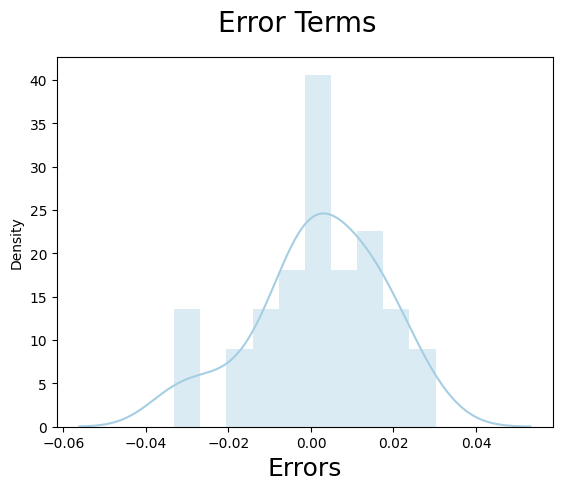

Text(0, 0.5, 'y_pred')

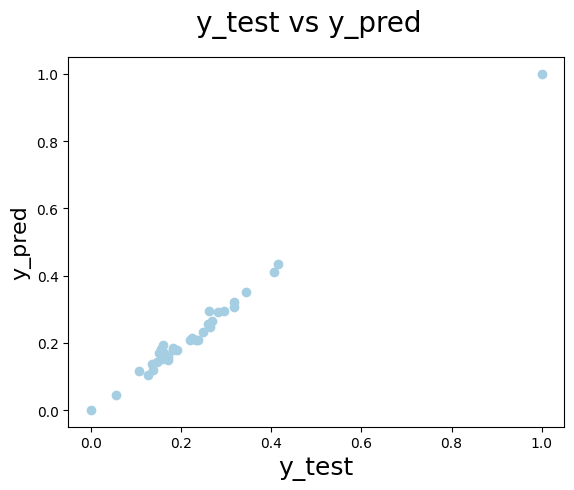

In [352]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


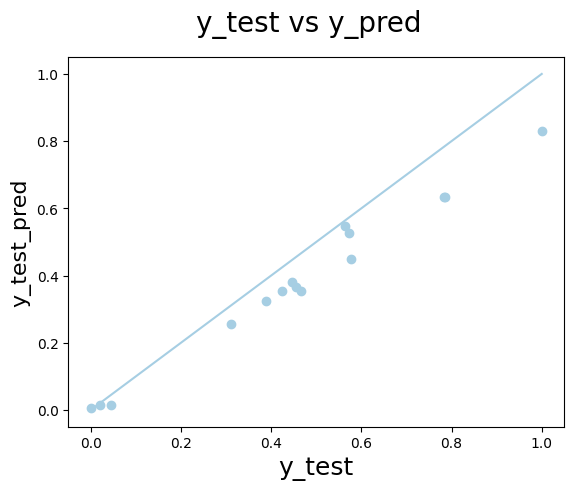

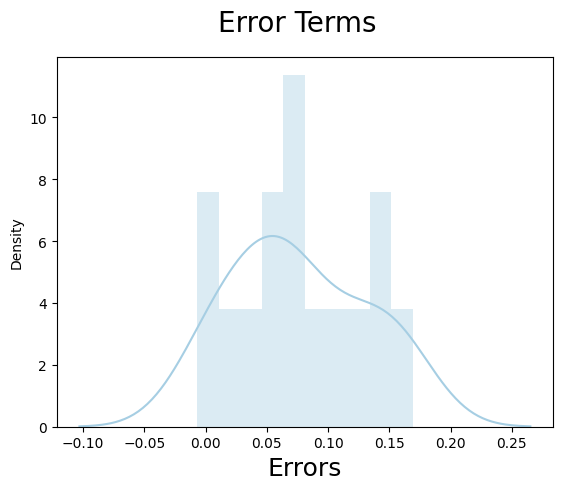

In [353]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


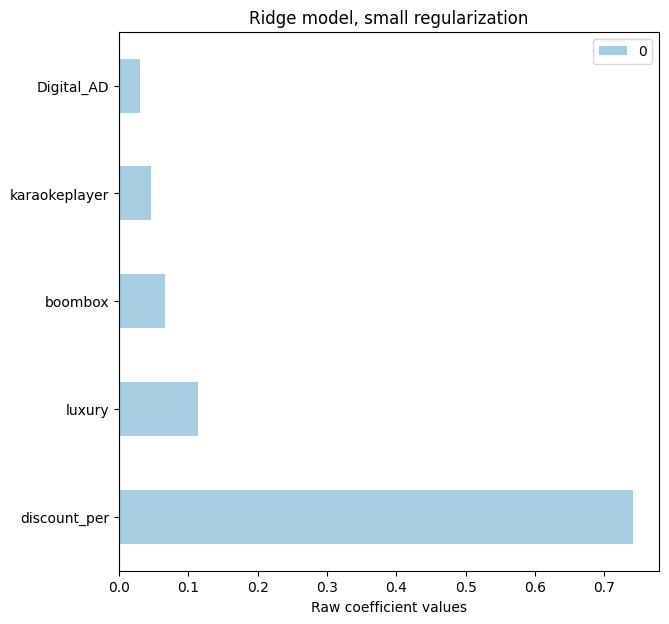

In [354]:
ha_model1=pd.DataFrame(ha_mode1.params)
ha_model1.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

Multiplicative

In [ ]:

# ha_wk=ha.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
#                                         'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
#                                          'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
#                                           "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

# ha_wk=pd.merge(ha_wk,weekly_kpis,on='week')

# ha_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

# ha_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
#        'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

# ha_wk.order_payment_type.value_counts()
# ha_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
# ha_wk["cod_per"]=ha_wk["order_payment_cod"]/ha_wk["order_count"]
# ha_wk.drop("order_payment_cod",1,inplace=True)
# ha_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)
# ha_wk['sales_per']=(ha_wk['num_of_sales']-1)/7
# ha_wk.drop('num_of_sales',1,inplace=True)

In [355]:
ha_wk[ha_wk.columns]=nm.log(ha_wk[ha_wk.columns])

ha_wk=ha_wk.replace([nm.inf, -nm.inf], 0)
ha_wk=ha_wk.fillna(0)

# ha_wk.drop(['product_mrp','order_count','Other_AD','units'],1,inplace=True)

In [388]:
df_train, df_test = train_test_split(ha_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()
scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train


In [390]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=18, step=1)
selector.fit(X_train, y_train)

df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


Index(['product_procurement_sla', 'discount_per', 'fmradio',
       'homeaudiospeaker', 'luxury', 'boombox', 'djcontroller', 'dock',
       'hifisystem', 'voicerecorder', 'mean_temp_c', 'cool_deg_c',
       'total_snow', 'Digital_AD', 'Content_Marketing_AD',
       'Online_marketing_AD', 'cod_per', 'sales_per'],
      dtype='object')

In [391]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])


                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     324.2
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           3.94e-17
Time:                        06:52:16   Log-Likelihood:                 118.49
No. Observations:                  35   AIC:                            -199.0
Df Residuals:                      16   BIC:                            -169.4
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
1,discount_per,1561.31
3,homeaudiospeaker,1453.79
2,fmradio,170.87
16,cod_per,126.31
7,dock,43.67
4,luxury,36.18
14,Content_Marketing_AD,34.18
8,hifisystem,33.01
15,Online_marketing_AD,31.78
5,boombox,26.96


In [392]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     364.4
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           2.02e-18
Time:                        06:52:27   Log-Likelihood:                 118.47
No. Observations:                  35   AIC:                            -200.9
Df Residuals:                      17   BIC:                            -172.9
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

,Features,VIF
1,discount_per,1462.99
3,homeaudiospeaker,1353.24
2,fmradio,170.14
16,cod_per,126.25
7,dock,43.63
14,Content_Marketing_AD,34.17
4,luxury,33.98
8,hifisystem,32.50
15,Online_marketing_AD,31.42
5,boombox,26.95


In [382]:
features=features.drop('hifisystem',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     620.3
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.93e-26
Time:                        06:50:43   Log-Likelihood:                 112.48
No. Observations:                  35   AIC:                            -203.0
Df Residuals:                      24   BIC:                            -185.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0109 

,Features,VIF
0,fmradio,96.87
1,homeaudiospeaker,74.09
8,cod_per,58.48
5,dock,32.79
2,luxury,24.27
3,boombox,19.93
7,Content_Marketing_AD,16.59
6,mean_temp_c,9.06
9,sales_per,6.14
4,djcontroller,4.27


In [383]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     681.5
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.32e-27
Time:                        06:50:52   Log-Likelihood:                 111.57
No. Observations:                  35   AIC:                            -203.1
Df Residuals:                      25   BIC:                            -187.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0040 

,Features,VIF
0,fmradio,93.98
1,homeaudiospeaker,73.53
8,cod_per,56.18
5,dock,32.59
2,luxury,21.33
3,boombox,19.16
7,Content_Marketing_AD,16.05
6,mean_temp_c,7.95
4,djcontroller,4.27


In [384]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     748.0
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.03e-28
Time:                        06:51:02   Log-Likelihood:                 110.46
No. Observations:                  35   AIC:                            -202.9
Df Residuals:                      26   BIC:                            -188.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0061 

,Features,VIF
0,fmradio,89.13
1,homeaudiospeaker,59.80
7,cod_per,54.17
5,dock,29.03
2,luxury,20.33
6,Content_Marketing_AD,15.51
3,boombox,13.18
4,djcontroller,4.17


In [385]:
features=features.drop('djcontroller',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     784.0
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.75e-29
Time:                        06:51:12   Log-Likelihood:                 108.29
No. Observations:                  35   AIC:                            -200.6
Df Residuals:                      27   BIC:                            -188.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0002 

,Features,VIF
0,fmradio,78.79
1,homeaudiospeaker,57.27
6,cod_per,47.84
4,dock,26.94
2,luxury,20.21
5,Content_Marketing_AD,15.26
3,boombox,12.68


In [386]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     872.8
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.72e-30
Time:                        06:51:37   Log-Likelihood:                 106.84
No. Observations:                  35   AIC:                            -199.7
Df Residuals:                      28   BIC:                            -188.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -9.302e-05      0.012  

,Features,VIF
0,fmradio,78.65
1,homeaudiospeaker,55.16
5,cod_per,45.79
4,dock,21.74
2,luxury,18.35
3,boombox,12.56


In [387]:
features=features.drop('dock',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     1022.
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           1.17e-31
Time:                        06:51:46   Log-Likelihood:                 105.80
No. Observations:                  35   AIC:                            -199.6
Df Residuals:                      29   BIC:                            -190.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0003      0.013  

,Features,VIF
1,homeaudiospeaker,46.40
0,fmradio,46.35
4,cod_per,33.40
2,luxury,17.03
3,boombox,12.33


In [366]:
features=features.drop('discount_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

                            OLS Regression Results                            
Dep. Variable:                    gmv   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                     854.0
Date:                Tue, 10 Oct 2023   Prob (F-statistic):           5.55e-30
Time:                        06:48:12   Log-Likelihood:                 109.78
No. Observations:                  35   AIC:                            -203.6
Df Residuals:                      27   BIC:                            -191.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0051      0.012  

,Features,VIF
0,fmradio,58.61
1,homeaudiospeaker,57.20
6,cod_per,51.37
3,boombox,19.31
2,luxury,18.27
5,Digital_AD,5.37
4,cool_deg_c,2.72


In [367]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
ha_model2=lm
ha_features2=features

                                 OLS Regression Results                                
Dep. Variable:                    gmv   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.063e+04
Date:                Tue, 10 Oct 2023   Prob (F-statistic):                    3.36e-46
Time:                        06:48:36   Log-Likelihood:                          109.66
No. Observations:                  35   AIC:                                     -205.3
Df Residuals:                      28   BIC:                                     -194.4
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

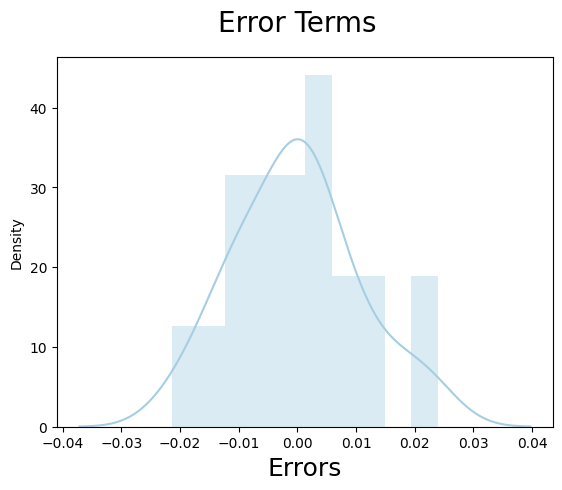

Text(0, 0.5, 'y_pred')

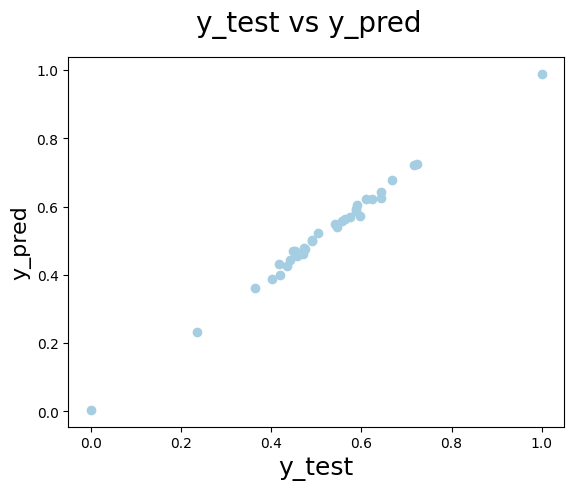

In [368]:
fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


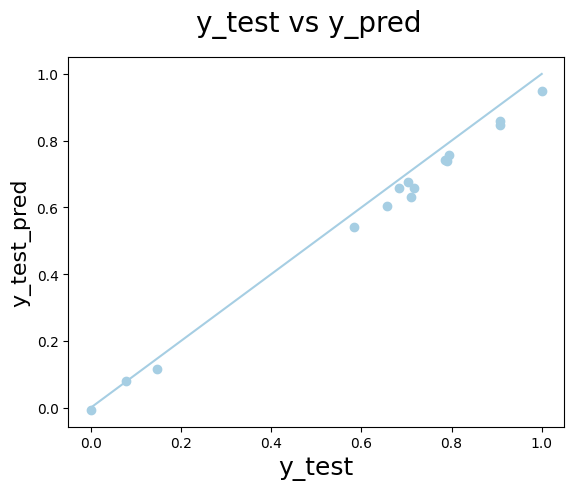

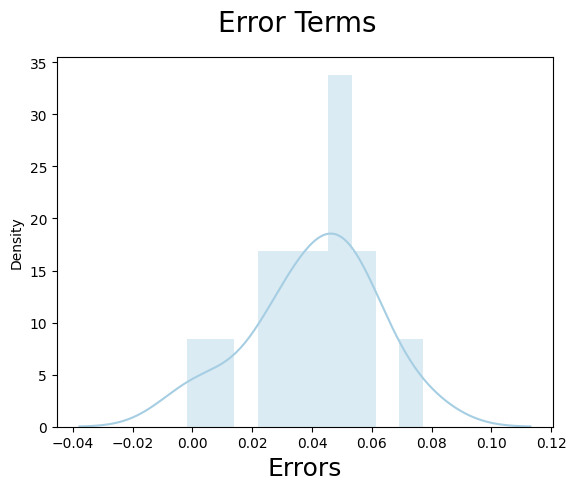

In [369]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]

y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


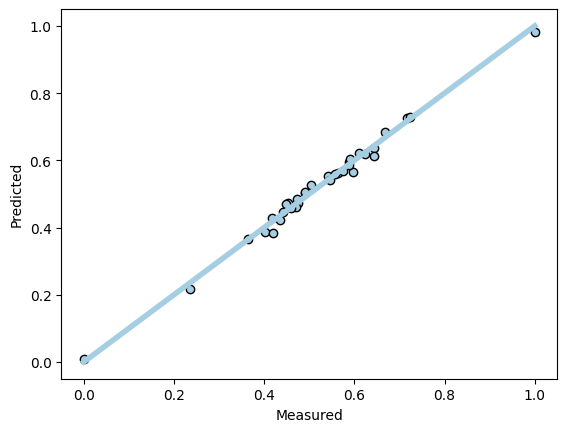

array([0.99619329, 0.97471714, 0.98553855, 0.97141323, 0.98270574])

In [370]:
f = KFold(n_splits = 5, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)

y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

scores

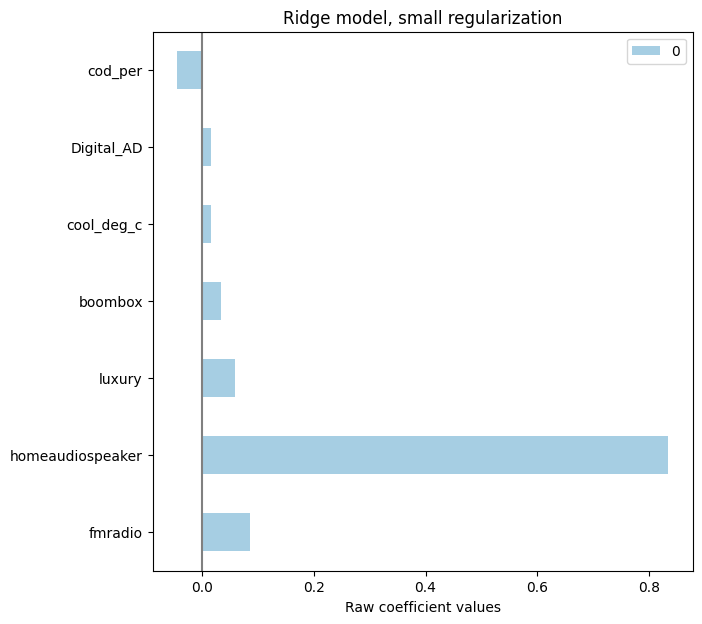

In [371]:
ha_model2=pd.DataFrame(ha_model2.params)
ha_model2.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [ ]:
ha_features

Gaming Accessories

In [ ]:
game=EleData3[EleData3.product_analytic_sub_category=='gamingaccessory']
# game.discount_per


In [ ]:
# game.columns
game_dum=pd.get_dummies(game.product_analytic_vertical_derived)
game=pd.concat([game,game_dum],axis=1)

In [ ]:
for i in num:
  sns.boxplot(x=ha[i])
  plt.title(i)
  plt.show()

In [ ]:


q1=game['product_mrp'].quantile(0.25)
q3=game['product_mrp'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['product_mrp']>up,'product_mrp']=up
game.loc[game['product_mrp']<lw,'product_mrp']=lw


q1=game['gmv'].quantile(0.25)
q3=game['gmv'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['gmv']>up,'gmv']=up
game.loc[game['gmv']<lw,'gmv']=lw


q1=game['listing_price'].quantile(0.25)
q3=game['listing_price'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['listing_price']>up,'listing_price']=up
game.loc[game['listing_price']<lw,'listing_price']=lw


q1=game['discount_per'].quantile(0.25)
q3=game['discount_per'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['discount_per']>up,'discount_per']=up
game.loc[game['discount_per']<lw,'discount_per']=lw

# game[game['discount_per']>1.39]
q1=game['sla'].quantile(0.25)
q3=game['sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['sla']>up,'sla']=up
game.loc[game['sla']<lw,'sla']=lw
q1=game['product_procurement_sla'].quantile(0.25)
q3=game['product_procurement_sla'].quantile(0.75)
iqr=q3-q1
lw=q1-iqr*1.5
up=q3+iqr*1.5
print(lw," ",up)
game.loc[game['product_procurement_sla']>up,'product_procurement_sla']=up
game.loc[game['product_procurement_sla']<lw,'product_procurement_sla']=lw


In [ ]:
game.gmv.describe()

284-1.5*(284+940)

In [ ]:
game_wk=game.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
                                        'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
                                         'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
                                          "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

game_wk=pd.merge(game_wk,weekly_kpis,on='week')

game_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

# game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
      #  'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day'],1,inplace=True)

game_wk.order_payment_type.value_counts()
game_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
game_wk["cod_per"]=game_wk["order_payment_cod"]/game_wk["order_count"]
game_wk.drop("order_payment_cod",1,inplace=True)
game_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)

game_wk['sales_per']=(game_wk['num_of_sales']-1)/7
game_wk.drop('num_of_sales',1,inplace=True)

In [ ]:
plt.figure(figsize=(15,6))
sns.barplot(x=game_wk['week'],y=game_wk['order_count'])
plt.title("Week vs GMV")
plt.show()
## 16 , 19, 20, 34, 36, 44

In [ ]:
plt.figure(figsize=(15,6))
width=0.5
plt.bar(x=game_wk['week'],height=game_wk['sales_per'],width=width)
plt.xticks(game_wk['week'])
plt.show()
plt.figure(figsize=(15,6))
plt.bar(x=game_wk['week'],height=game_wk['gmv'],width=width)
plt.xticks(game_wk['week'])
plt.show()


## sales per as impact

In [ ]:
plt.figure(figsize=(15,6))
plt.bar(x=game_wk['week'],height=game_wk['discount_per'])
plt.xticks(game_wk['week'])
plt.show()

## not very much changes because of discount


In [ ]:
plt.figure(figsize=(15,6))
sns.scatterplot(x=game_wk['week'],y=game_wk['gmv'],hue=game_wk['Holiday_flag'])
plt.xticks(game_wk['week'])
plt.show()


In [ ]:
markinv = ['Total_Investment_AD', 'TV_AD','Digital_AD', 'Content_Marketing_AD', 'Online_marketing_AD','Affiliates_AD', 'SEM_AD', 'Radio_AD', 'Other_AD','gmv']

# average_sale_per_week
# plt.figure(figsize=(25, 19))
x=1
for i in markinv:
  if i != 'gmv':
    # plt.subplot(9,1,x)
    plt.figure(figsize=(15, 5))
    plt.title(i)
    sns.lineplot(x=game_wk['week'],y=nm.log(game_wk[i]))
    sns.lineplot(x=game_wk['week'],y=nm.log(game_wk['gmv']))
    plt.xticks(game_wk['week'])
    x=x+1
    plt.show()

## affiliates , digital and other and total


In [ ]:
wc = ['mean_temp_c', 'total_rain', 'total_snow','NPS',"Stock_Index",'max_temp_c']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=game_wk['gmv'],x=pd.cut(game_wk[i],bins=4))
  x=x+1

  ## max temp can be kept


In [ ]:
wc = ['sla','product_procurement_sla']

plt.figure(figsize=(15, 15))
x=1
for i in wc:
  plt.subplot(3,2,x)
  plt.title(i)
  sns.barplot(y=game_wk['gmv'],x=pd.cut(game_wk[i],bins=6))
  x=x+1

## sla not required

In [ ]:
game_wk.drop(['order_count','units','Other_AD','product_mrp','total_snow','total_rain','cool_deg_c','max_temp_c','Other_AD','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
       'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other','week'],1,inplace=True)
game_wk.columns

In [ ]:
game_wk.drop('Total_Investment_AD',1,inplace=True)

In [ ]:
df_train, df_test = train_test_split(game_wk, train_size = 0.7, test_size = 0.3, random_state = 100)

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']


In [ ]:
X_train.columns


In [ ]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=12, step=1)
selector.fit(X_train, y_train)


In [ ]:
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


In [ ]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])

In [ ]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

In [ ]:
features=features.drop('SEM_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

In [ ]:
features=features.drop('cod_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('NPS',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])
#

In [ ]:
features=features.drop('sales_per',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('TV_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('Affiliates_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('Sponsorship_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


In [ ]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()


In [ ]:
y_test

In [ ]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)



fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
# game_wk=game.groupby(['week']).agg({"order_item_id":"nunique",'gmv':'sum','units':'sum','order_payment_type':'sum','sla':'mean',
#                                         'product_mrp':'sum','product_procurement_sla':'mean','listing_price':'sum',
#                                          'discount_per':'sum','Stock_Index':'max','NPS':'max','pay_date_flag':'max',
#                                           "Holiday_flag": "nunique",'sale_date':"nunique"}).round(2)

# game_wk=pd.merge(game_wk,weekly_kpis,on='week')

# game_wk.rename(columns={"sales_date":"num_of_sales"},inplace=True)

# game_wk.drop(['heat_deg_c','mon_temp_c','Year','Month','Day','Total Investment', 'TV', 'Digital', 'Sponsorship', 'Content Marketing',
#        'Online marketing', 'Affiliates', 'SEM', 'Radio', 'Other'],1,inplace=True)

# game_wk.order_payment_type.value_counts()
# game_wk.rename(columns={'order_item_id':'order_count',"order_payment_type":"order_payment_cod",'mon_temp_c':"min_temp_c","pay_date_flag":"pay_day_in_wk"},inplace=True)
# game_wk["cod_per"]=game_wk["order_payment_cod"]/game_wk["order_count"]
# game_wk.drop("order_payment_cod",1,inplace=True)
# game_wk.rename(columns={'sale_date':"num_of_sales"},inplace=True)

# game_wk['sales_per']=(game_wk['num_of_sales']-1)/7
# game_wk.drop('num_of_sales',1,inplace=True)
# game_wk.drop(['order_count','units','Other_AD','product_mrp'],1,inplace=True)

In [ ]:
# multiplicative
game_wk[game_wk.columns]=nm.log(game_wk[game_wk.columns])


In [ ]:

game_wk=game_wk.replace([nm.inf, -nm.inf], 0)
game_wk=game_wk.fillna(0)



In [ ]:
df_train, df_test = train_test_split(game_wk, train_size = 0.7, test_size = 0.3, random_state = 100)
scaler=MinMaxScaler()

scale_var=camera.columns
df_train[df_train.columns]=scaler.fit_transform(df_train[df_train.columns])
# df_train
X_train=df_train.drop('gmv',1)
y_train=df_train['gmv']
# X_train


In [ ]:
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=15, step=1)
selector.fit(X_train, y_train)
df=pd.DataFrame(list(zip(X_train.columns,selector.support_,selector.ranking_)))
features =X_train.columns[selector.support_]
features


In [ ]:
x_train_m =build_model(X_train[features],y_train)
checkVIF(X_train[features])



In [ ]:
features=features.drop('Radio_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('listing_price',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('Affiliates_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])

In [ ]:
features=features.drop('Content_Marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('Stock_Index',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('mean_temp_c',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('Online_marketing_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('Holiday_flag',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('Sponsorship_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('product_procurement_sla',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('SEM_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
features=features.drop('Digital_AD',1)
x_train_m=build_model(X_train[features],y_train)
checkVIF(X_train[features])


In [ ]:
lm = sm.OLS(y_train,X_train[features]).fit() # fitting the model
print(lm.summary()) # model summary
y_train_pred=lm.predict(X_train[features])
game_model2=lm

fig=plt.figure()
sns.distplot((y_train-y_train_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()

# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train ,y_train_pred)
fig.suptitle('y_train vs y_pred', fontsize = 20)
# Plot heading
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)


In [ ]:
df_test[df_train.columns]=scaler.fit_transform(df_test[df_train.columns])
X_test=df_test.drop('gmv',1)
y_test=df_test['gmv']
X_test=sm.add_constant(X_test)
X_test=X_test[features]
y_test_pred=lm.predict(X_test)

# Plotting y_test and y_pred to understand the spread

fig,ax = plt.subplots()
ax.scatter(y_test, y_test_pred )
fig.suptitle('y_test vs y_pred', fontsize = 20)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])#,  lw=1)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

fig=plt.figure()
sns.distplot((y_test-y_test_pred),bins=10)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize = 18)
plt.show()



In [ ]:
f = KFold(n_splits = 10, shuffle = True, random_state = 100)
lm=LinearRegression()
scores = cross_val_score(lm, X_train[features], y_train, scoring='r2', cv=f)
scores
y_pred = cross_val_predict(lm, X_train[features], y_train, cv=f)
print(scores)


fig, ax = plt.subplots()
ax.scatter(y_train, y_pred, edgecolors=(0, 0, 0))
ax.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],  lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [ ]:
game_model2=pd.DataFrame(game_model2.params)

In [ ]:
game_model2.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)